In [ ]:
# Spotify Source = https://zenodo.org/record/2594557
# Songs Source = https://www.kaggle.com/gyani95/380000-lyrics-from-metrolyrics

## <a href="https://nbviewer.jupyter.org/github/zavonn/MusicLyricsUnsupervisedClustering/blob/master/Music%20Lyrics%20Clustering%20for%20Playlist%20Prediction.ipynb?flush_cache=true">Access the Interactive Notebook here to display the Tableau Dashboards</a>

# Music Lyrics Clustering for Playlist Prediction

## Objective: To cluster tracks within user playlists using Unsupervised Learning in order to predict other tracks that the user is likely to add to a playlist.

This project involves using the Spotify Playlists Dataset in conjunction with the 380,000+ lyrics from MetroLyrics dataset from Kaggle. The Spotify dataset is based on the subset of users in the #nowplaying dataset who publish their #nowplaying tweets via Spotify. In principle, the dataset holds users, their playlists and the tracks contained in these playlists.

A description of the generation of the dataset and the dataset itself can be found in the following paper:
Pichl, Martin; Zangerle, Eva; Specht, Günther: "Towards a Context-Aware Music Recommendation Approach: What is Hidden in the Playlist Name?" in 15th IEEE International Conference on Data Mining Workshops (ICDM 2015), pp. 1360-1365, IEEE, Atlantic City, #### 2015.

The Total Dataset described below represents a union of the Spotify and Lyrics datasets. The Reduced Dataset is a result of filtering the Total Dataset for Playlists which contain between 15 and 150 tracks, and users that have created less than 400 playlists. The reductions were made in an attempt to identify playlists created by everyday users. A number of playlists in the original Total Dataset included thousands of tracks and a number of users in the Total Dataset had created thousands of playlists. Once the Total Dataset was filtered according to the conditions above, a random sample of 15 tracks was chosen per playlist, and the unique artist tracks in the reduced dataset were clustered via unsupervised learning techniques such as KMEANS, Gaussian Mixture Machines, DBSCAN, and HDBSCAN. 10 of the 15 tracks per playlist were then used to assign a cluster to every playlist based on the most frequently assigned cluster for the individual tracks within the playlist. If a playlist did not contain a cluster that was assigned to its contained tracks more than once, the label NaN was assigned. Next, the remaining 5 tracks per playlist were used to generate scores that ranged from 1 to 5, for each song included in the cluster assigned to the playlist through unsupervised learning. All scores of 0 were converted to NaN, and all clusters of -1 generated by DBSCAN were also converted to NaN. Only playlists that were assigned clusters that resulted in the accurate prediction of at least 1 out of 5 tracks were scored.

## Simplified Workflow:
### Total Dataset -> filter -> Reduced Dataset -> cluster unique artist tracks through unsupervised learning -> split the Reduced Dataset of playlists with 15 tracks each into dataframes of 10 (df_10) and 5 (df_5) tracks -> using df_10, assign every playlist a cluster based on the cluster most frequently assigned to the tracks contained in that playlist -> using df_5, evaluate how many of the remaining tracks in each playlist were actually found in the clusters assigned to playlists using df_10

In [20]:
%%HTML
<div class='tableauPlaceholder' id='viz1577022404075' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;UN&#47;UNSUPMUSIC_CAP&#47;Dashboard1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='UNSUPMUSIC_CAP&#47;Dashboard1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;UN&#47;UNSUPMUSIC_CAP&#47;Dashboard1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1577022404075');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='1000px';vizElement.style.height='827px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='1000px';vizElement.style.height='827px';} else { vizElement.style.width='100%';vizElement.style.height='727px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [21]:
%%HTML
<div class='tableauPlaceholder' id='viz1577022484727' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;UN&#47;UNSUPMUSIC_CAP&#47;Dashboard2&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='UNSUPMUSIC_CAP&#47;Dashboard2' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;UN&#47;UNSUPMUSIC_CAP&#47;Dashboard2&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1577022484727');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='1000px';vizElement.style.height='827px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='1000px';vizElement.style.height='827px';} else { vizElement.style.width='100%';vizElement.style.height='727px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [22]:
%%HTML
<div class='tableauPlaceholder' id='viz1577022525196' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;UN&#47;UNSUPMUSIC_CAP&#47;Dashboard3&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='UNSUPMUSIC_CAP&#47;Dashboard3' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;UN&#47;UNSUPMUSIC_CAP&#47;Dashboard3&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1577022525196');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='1000px';vizElement.style.height='827px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='1000px';vizElement.style.height='827px';} else { vizElement.style.width='100%';vizElement.style.height='727px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [23]:
%%HTML
<div class='tableauPlaceholder' id='viz1577022578260' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;UN&#47;UNSUPMUSIC_CAP&#47;Dashboard4&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='UNSUPMUSIC_CAP&#47;Dashboard4' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;UN&#47;UNSUPMUSIC_CAP&#47;Dashboard4&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1577022578260');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='1000px';vizElement.style.height='827px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='1000px';vizElement.style.height='827px';} else { vizElement.style.width='100%';vizElement.style.height='927px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [24]:
%%HTML
<div class='tableauPlaceholder' id='viz1577022612019' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;UN&#47;UNSUPMUSIC_CAP&#47;Dashboard5&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='UNSUPMUSIC_CAP&#47;Dashboard5' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;UN&#47;UNSUPMUSIC_CAP&#47;Dashboard5&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1577022612019');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='1000px';vizElement.style.height='827px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='1000px';vizElement.style.height='827px';} else { vizElement.style.width='100%';vizElement.style.height='727px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [25]:
%%HTML
<div class='tableauPlaceholder' id='viz1577022642046' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;UN&#47;UNSUPMUSIC_CAP&#47;Dashboard6&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='UNSUPMUSIC_CAP&#47;Dashboard6' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;UN&#47;UNSUPMUSIC_CAP&#47;Dashboard6&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1577022642046');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='1000px';vizElement.style.height='827px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='1000px';vizElement.style.height='827px';} else { vizElement.style.width='100%';vizElement.style.height='1227px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [26]:
%%HTML
<div class='tableauPlaceholder' id='viz1577022740858' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;UN&#47;UNSUPMUSIC_CAP&#47;Dashboard8&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='UNSUPMUSIC_CAP&#47;Dashboard8' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;UN&#47;UNSUPMUSIC_CAP&#47;Dashboard8&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1577022740858');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='1000px';vizElement.style.height='827px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='1000px';vizElement.style.height='827px';} else { vizElement.style.width='100%';vizElement.style.height='727px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [27]:
%%HTML
<div class='tableauPlaceholder' id='viz1577022765197' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;UN&#47;UNSUPMUSIC_CAP&#47;Dashboard9&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='UNSUPMUSIC_CAP&#47;Dashboard9' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;UN&#47;UNSUPMUSIC_CAP&#47;Dashboard9&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1577022765197');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='1000px';vizElement.style.height='827px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='1000px';vizElement.style.height='827px';} else { vizElement.style.width='100%';vizElement.style.height='727px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [28]:
%%HTML
<div class='tableauPlaceholder' id='viz1577022802244' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;UN&#47;UNSUPMUSIC_CAP&#47;Dashboard10&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='UNSUPMUSIC_CAP&#47;Dashboard10' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;UN&#47;UNSUPMUSIC_CAP&#47;Dashboard10&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1577022802244');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='1000px';vizElement.style.height='827px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='1000px';vizElement.style.height='827px';} else { vizElement.style.width='100%';vizElement.style.height='927px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Spotify Source = https://zenodo.org/record/2594557
# Songs Source = https://www.kaggle.com/gyani95/380000-lyrics-from-metrolyrics

In [2]:
spotify = pd.read_csv("spotify_dataset.csv", names=['user', 'artist', 'track', 'playlist', 'other'])

In [3]:
spotify["other"][~spotify["other"].isnull()]

14734       Instrumenal - Home Listens
15930                   We're People""
18824                     Samedi matin
22436                   We're People""
23008                          Kiss Me
                       ...            
12883430                       träning
12891292         No. 2 - Instrumental"
12896255                50 Best Handel
12896256                50 Best Handel
12896257                50 Best Handel
Name: other, Length: 10295, dtype: object

In [4]:
spotify["other"].isnull().count()

12901980

In [5]:
spotify = spotify[['user', 'artist', 'track', 'playlist']]

In [6]:
spotify = spotify.astype(str)

In [7]:
spotify = spotify.apply(lambda x : x.str.replace(' ', '').str.lower())

In [8]:
spotify['userplaylist'] = spotify['user'] + ' ' + spotify['playlist']

In [9]:
spotify['artisttrack'] = spotify['artist'] + ' ' + spotify['track']

In [10]:
spotify = spotify.drop(0)

In [11]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12901979 entries, 1 to 12901979
Data columns (total 6 columns):
user            object
artist          object
track           object
playlist        object
userplaylist    object
artisttrack     object
dtypes: object(6)
memory usage: 689.0+ MB


In [12]:
spotify.head()

,user,artist,track,playlist,userplaylist,artisttrack
1,9cc0cfd4d7d7885102480dd99e7a90d6,elviscostello,(theangelswannawearmy)redshoes,hardrock2010,9cc0cfd4d7d7885102480dd99e7a90d6 hardrock2010,elviscostello (theangelswannawearmy)redshoes
2,9cc0cfd4d7d7885102480dd99e7a90d6,elviscostello&theattractions,"(what'ssofunny'bout)peace,loveandunderstanding",hardrock2010,9cc0cfd4d7d7885102480dd99e7a90d6 hardrock2010,elviscostello&theattractions (what'ssofunny'bo...
3,9cc0cfd4d7d7885102480dd99e7a90d6,tiffanypage,7yearstoolate,hardrock2010,9cc0cfd4d7d7885102480dd99e7a90d6 hardrock2010,tiffanypage 7yearstoolate
4,9cc0cfd4d7d7885102480dd99e7a90d6,elviscostello&theattractions,accidentswillhappen,hardrock2010,9cc0cfd4d7d7885102480dd99e7a90d6 hardrock2010,elviscostello&theattractions accidentswillhappen
5,9cc0cfd4d7d7885102480dd99e7a90d6,elviscostello,alison,hardrock2010,9cc0cfd4d7d7885102480dd99e7a90d6 hardrock2010,elviscostello alison


In [13]:
songs = pd.read_csv("lyrics.csv")

In [14]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362237 entries, 0 to 362236
Data columns (total 6 columns):
index     362237 non-null int64
song      362235 non-null object
year      362237 non-null int64
artist    362237 non-null object
genre     362237 non-null object
lyrics    266557 non-null object
dtypes: int64(2), object(4)
memory usage: 16.6+ MB


In [15]:
songs = songs.drop(['year'], axis=1).dropna()

In [16]:
songs = songs.astype(str)

In [17]:
songs.artist = songs.artist.str.replace(' ', '')
songs.artist = songs.artist.str.lower()

In [18]:
songs.song = songs.song.str.replace(' ', '') 
songs.song = songs.song.str.lower()

In [19]:
songs.artist = songs.artist.str.replace('-', '')
songs.song = songs.song.str.replace('-', '') 

In [20]:
songs['artisttrack'] = songs['artist'] + ' ' + songs['song']

In [21]:
songs.head()

,index,song,artist,genre,lyrics,artisttrack
0,0,egoremix,beyonceknowles,Pop,"Oh baby, how you doing?\nYou know I'm gonna cu...",beyonceknowles egoremix
1,1,thentellme,beyonceknowles,Pop,"playin' everything so easy,\nit's like you see...",beyonceknowles thentellme
2,2,honesty,beyonceknowles,Pop,If you search\nFor tenderness\nIt isn't hard t...,beyonceknowles honesty
3,3,youaremyrock,beyonceknowles,Pop,"Oh oh oh I, oh oh oh I\n[Verse 1:]\nIf I wrote...",beyonceknowles youaremyrock
4,4,blackculture,beyonceknowles,Pop,"Party the people, the people the party it's po...",beyonceknowles blackculture


In [22]:
songs.tail()

,index,song,artist,genre,lyrics,artisttrack
362232,362232,whoamidrinkingtonight,edensedge,Country,"I gotta say\nBoy, after only just a couple of ...",edensedge whoamidrinkingtonight
362233,362233,liar,edensedge,Country,I helped you find her diamond ring\nYou made m...,edensedge liar
362234,362234,lastsupper,edensedge,Country,Look at the couple in the corner booth\nLooks ...,edensedge lastsupper
362235,362235,christaloneliveinstudio,edensedge,Country,When I fly off this mortal earth\nAnd I'm meas...,edensedge christaloneliveinstudio
362236,362236,amen,edensedge,Country,I heard from a friend of a friend of a friend ...,edensedge amen


In [23]:
common = np.intersect1d(spotify.artist.unique(), songs.artist.unique()) 

In [24]:
len(common)

8219

In [25]:
combo = spotify[spotify['artist'].isin(common)]

In [26]:
combo.reset_index(inplace=True, drop=True)

In [27]:
combo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3202077 entries, 0 to 3202076
Data columns (total 6 columns):
user            object
artist          object
track           object
playlist        object
userplaylist    object
artisttrack     object
dtypes: object(6)
memory usage: 146.6+ MB


In [28]:
len(combo.artisttrack.unique())

398038

In [29]:
common_arttrack = np.intersect1d(combo.artisttrack, songs.artisttrack) 

In [30]:
len(common_arttrack)

85863

In [31]:
combo_upd = combo[combo['artisttrack'].isin(common_arttrack)]

In [32]:
combo_upd.reset_index(inplace=True, drop=True)

In [33]:
combo_upd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567923 entries, 0 to 1567922
Data columns (total 6 columns):
user            1567923 non-null object
artist          1567923 non-null object
track           1567923 non-null object
playlist        1567923 non-null object
userplaylist    1567923 non-null object
artisttrack     1567923 non-null object
dtypes: object(6)
memory usage: 71.8+ MB


In [34]:
print(f'The number of unique users in the dataset is {len(combo_upd.user.unique())}')
print(f'The number of unique artists in the dataset is {len(combo_upd.artist.unique())}')
print(f'The number of unique artist tracks in the dataset is {len(combo_upd.artisttrack.unique())}')
print(f'The number of unique user playlists in the dataset is {len(combo_upd.userplaylist.unique())}')

The number of unique users in the dataset is 14422
The number of unique artists in the dataset is 5799
The number of unique artist tracks in the dataset is 85863
The number of unique user playlists in the dataset is 108971


In [35]:
print(f'The number of unique users in the original dataset was {len(spotify.user.unique())}') 
print(f'The number of unique artists in the original dataset is {len(spotify.artist.unique())}') 
print(f'The number of unique artist tracks in the original dataset is {len(spotify.artisttrack.unique())}')
print(f'The number of unique user playlists in the original dataset is {len(spotify.userplaylist.unique())}')

The number of unique users in the original dataset was 15918
The number of unique artists in the original dataset is 280735
The number of unique artist tracks in the original dataset is 2721615
The number of unique user playlists in the original dataset is 239858


In [36]:
df = pd.merge(combo_upd, songs, on=['artisttrack'], how='left')

In [37]:
combo_fin = df.drop(['index','song', 'artist_y'], axis=1)

In [38]:
combo_final = combo_fin.drop_duplicates().reset_index(drop=True)

In [39]:
combo_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1564431 entries, 0 to 1564430
Data columns (total 8 columns):
user            1564431 non-null object
artist_x        1564431 non-null object
track           1564431 non-null object
playlist        1564431 non-null object
userplaylist    1564431 non-null object
artisttrack     1564431 non-null object
genre           1564431 non-null object
lyrics          1564431 non-null object
dtypes: object(8)
memory usage: 95.5+ MB


In [40]:
combo_final.to_pickle("SpotifySongs.pkl")

# Data Visualization

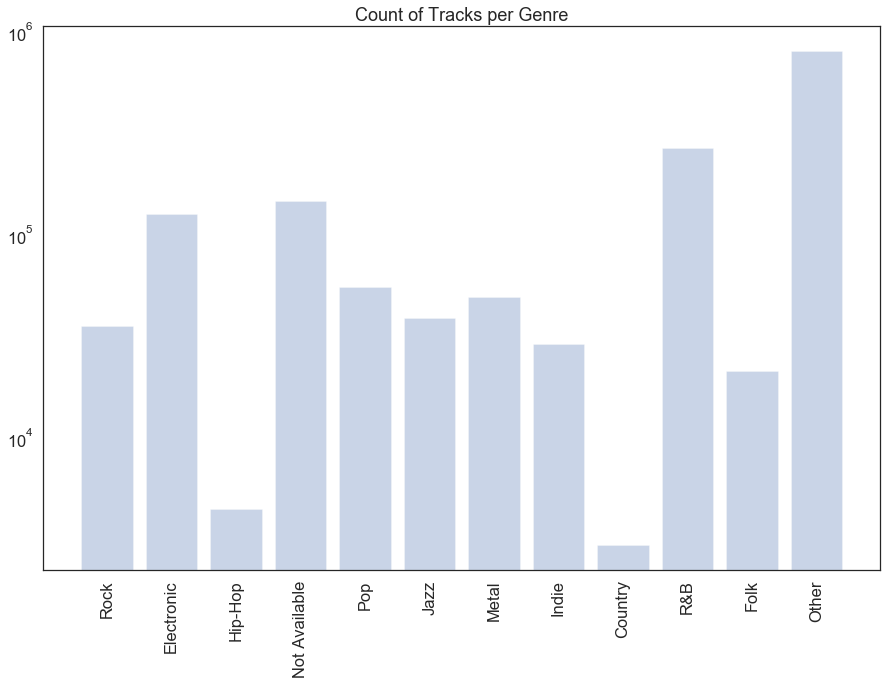

In [43]:
plt.figure(figsize=(15,10))
plt.bar(combo_final.genre.unique(), combo_final.groupby("genre").artisttrack.count(), alpha=0.3)
plt.title('Count of Tracks per Genre')
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()

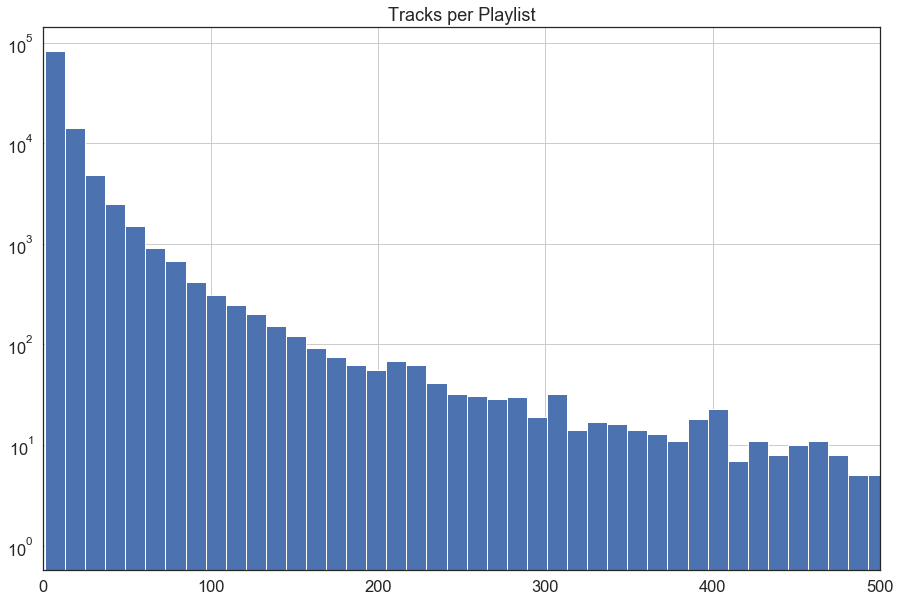

In [44]:
plt.figure(figsize=(15,10))
combo_final.groupby("userplaylist").artisttrack.count().hist(bins=250)
plt.title('Tracks per Playlist')
plt.yscale('log')
plt.xlim((0,500))
plt.show() 

In [45]:
combo_final.groupby("userplaylist").artisttrack.count().describe()

count    108971.000000
mean         14.356398
std          43.304904
min           1.000000
25%           2.000000
50%           6.000000
75%          12.000000
max        3000.000000
Name: artisttrack, dtype: float64

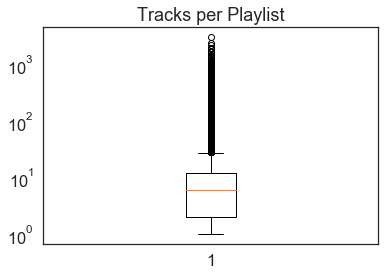

In [46]:
plt.boxplot(combo_final.groupby("userplaylist").artisttrack.count())
plt.title('Tracks per Playlist')
plt.yscale('log')
plt.show()

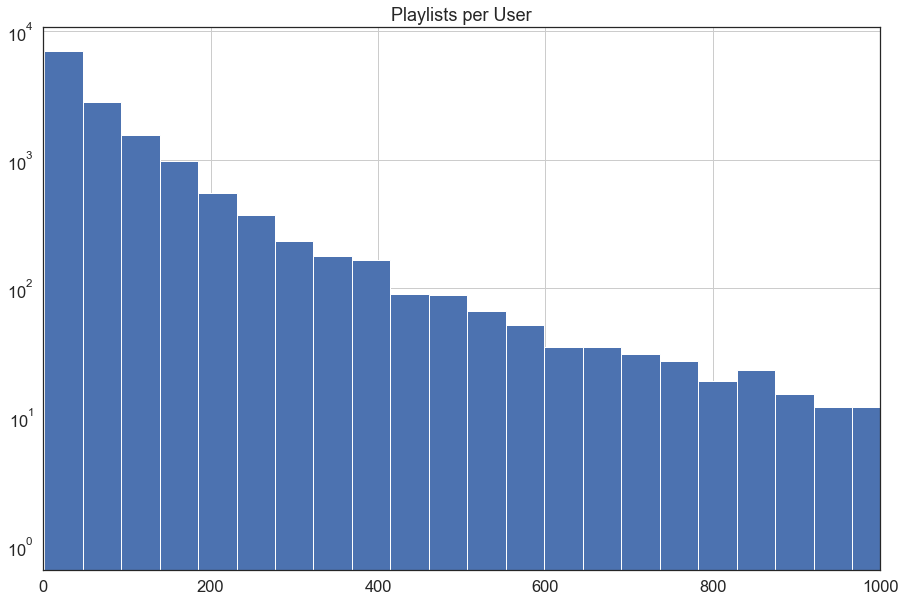

In [47]:
plt.figure(figsize=(15,10))
combo_final.groupby("user").userplaylist.count().hist(bins=250)
plt.title('Playlists per User')
plt.yscale('log')
plt.xlim((0,1000))
plt.show() 

In [48]:
combo_final.groupby("user").userplaylist.count().describe()

count    14422.000000
mean       108.475315
std        231.826260
min          1.000000
25%         15.000000
50%         50.000000
75%        122.000000
max      11496.000000
Name: userplaylist, dtype: float64

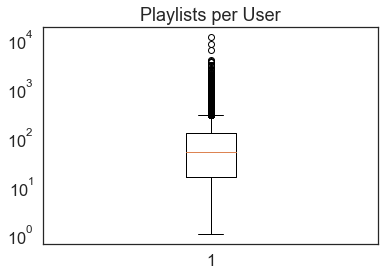

In [49]:
plt.boxplot(combo_final.groupby("user").userplaylist.count())
plt.title('Playlists per User')
plt.yscale('log')
plt.show()

# Removing Outliers

In [50]:
#combo_final = pd.read_pickle("SpotifySongs.pkl")

In [51]:
df_new = combo_final.copy() 

In [52]:
df_new.lyrics = df_new.lyrics.str.lower().str.replace("\n"," ")

In [53]:
df_new = df_new[df_new.lyrics!="*instrumental*"]
df_new = df_new[df_new.lyrics!="*instrumental *"]
df_new = df_new[df_new.lyrics!="instumental"]
df_new = df_new[df_new.lyrics!="instru mental"]
df_new = df_new[df_new.lyrics!="instrumental"]

In [54]:
df_new.lyrics[:20]

0     oh, it's so funny to be seeing you after so lo...
1     i'm really close tonight and i feel like i'm m...
2     four seasons in one day lying in the depths of...
3     down on the ocean floor that's where i'm headi...
4     you're not the girl you think you are, no no t...
5     i saw a newspaper picture from the political c...
6     walking 'round the room singing stormy weather...
7     well they blew up the chicken man in philly la...
8     in the day we sweat it out on the streets of a...
9     oh, no cannonballs did fly, no rifles cut us d...
10    mondays is for drinking to the seldom seen kid...
11    you say, i love you boy. but i know you lie. i...
12    i took a bite out of a mountain range, thought...
13    drinking in the morning sun blinking in the mo...
14    there's a wonderful world where all you desire...
15    angels fall to the floor like they would if i ...
16    i come from down in the valley where mister wh...
17    i've been knockin' on the door that holds 

In [55]:
a = df_new.groupby('userplaylist').filter(lambda x: (len(x['artisttrack']) < 150)&(len(x['artisttrack']) > 15))['userplaylist'].tolist()

In [56]:
len(a)

747621

In [57]:
b = df_new.groupby('user').filter(lambda x: len(x['userplaylist']) < 400)['user'].tolist()

In [58]:
len(b) 

1014735

In [59]:
df_new = df_new[df_new.user.isin(b)] 

In [60]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1014735 entries, 0 to 1564430
Data columns (total 8 columns):
user            1014735 non-null object
artist_x        1014735 non-null object
track           1014735 non-null object
playlist        1014735 non-null object
userplaylist    1014735 non-null object
artisttrack     1014735 non-null object
genre           1014735 non-null object
lyrics          1014735 non-null object
dtypes: object(8)
memory usage: 69.7+ MB


In [61]:
df_new.groupby("userplaylist").artisttrack.count().describe()

count    96078.000000
mean        10.561575
std         18.598020
min          1.000000
25%          2.000000
50%          5.000000
75%         11.000000
max        383.000000
Name: artisttrack, dtype: float64

In [62]:
df_new.groupby("user").userplaylist.count().describe()

count    13747.000000
mean        73.815014
std         81.061860
min          1.000000
25%         14.000000
50%         45.000000
75%        105.000000
max        399.000000
Name: userplaylist, dtype: float64

In [63]:
df_new2 = df_new[df_new.userplaylist.isin(a)] 

In [64]:
df_new2.groupby("userplaylist").artisttrack.count().describe()

count    15204.000000
mean        34.947974
std         23.532162
min         16.000000
25%         19.000000
50%         26.000000
75%         41.000000
max        149.000000
Name: artisttrack, dtype: float64

In [65]:
df_new2.groupby("user").userplaylist.count().describe()

count    7222.000000
mean       73.573664
std        64.002714
min        16.000000
25%        25.000000
50%        51.000000
75%       100.000000
max       374.000000
Name: userplaylist, dtype: float64

In [66]:
df_new2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 531349 entries, 28 to 1564430
Data columns (total 8 columns):
user            531349 non-null object
artist_x        531349 non-null object
track           531349 non-null object
playlist        531349 non-null object
userplaylist    531349 non-null object
artisttrack     531349 non-null object
genre           531349 non-null object
lyrics          531349 non-null object
dtypes: object(8)
memory usage: 36.5+ MB


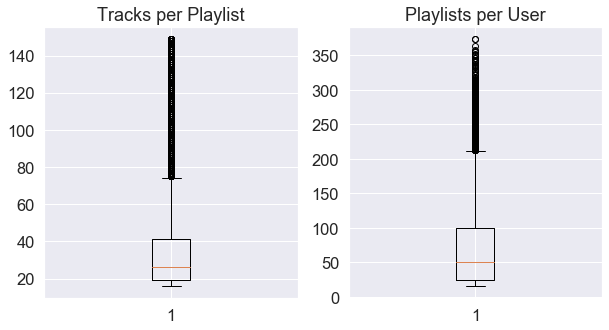

In [67]:
plt.figure(figsize=(10,5))
sns.set(font_scale=1.5)

plt.subplot(1,2,1)
plt.boxplot(df_new2.groupby("userplaylist").artisttrack.count())
plt.title('Tracks per Playlist')
plt.subplot(1,2,2)
plt.boxplot(df_new2.groupby("user").userplaylist.count())
plt.title('Playlists per User')
plt.show()

In [68]:
df_new2.artisttrack.value_counts()[:20]

fosterthepeople pumpedupkicks    878
bastille pompeii                 862
avicii wakemeup                  809
capitalcities safeandsound       782
gotye somebodythatiusedtoknow    773
awolnation sail                  705
adele rollinginthedeep           693
theblackkeys lonelyboy           683
coldplay fixyou                  670
blur song2                       655
coldplay thescientist            654
coldplay vivalavida              652
franzferdinand takemeout         645
foofighters everlong             608
disclosure latch                 590
coldplay yellow                  589
coldplay paradise                584
elliegoulding burn               557
calvinharris summer              553
coldplay clocks                  546
Name: artisttrack, dtype: int64

In [69]:
combo_upd.artisttrack.value_counts()[:20]

avicii wakemeup                  2242
bastille pompeii                 2014
fosterthepeople pumpedupkicks    1960
capitalcities safeandsound       1896
gotye somebodythatiusedtoknow    1827
adele rollinginthedeep           1766
daftpunk getlucky                1671
awolnation sail                  1564
disclosure latch                 1552
theblackkeys lonelyboy           1522
blur song2                       1493
coldplay vivalavida              1487
coldplay fixyou                  1461
franzferdinand takemeout         1433
carlyraejepsen callmemaybe       1431
calvinharris summer              1367
boniver skinnylove               1355
coldplay thescientist            1350
calvinharris sweetnothing        1343
daftpunk loseyourselftodance     1330
Name: artisttrack, dtype: int64

In [70]:
spotify.artisttrack.value_counts()[:20]

m83 midnightcity                                        2609
daftpunk getlucky-radioedit                             2341
imaginedragons radioactive                              2336
ofmonstersandmen littletalks                            2264
avicii wakemeup                                         2242
lorde royals                                            2219
thelumineers hohey                                      2180
macklemore&ryanlewis can'tholdus-feat.raydalton         2066
bastille pompeii                                        2014
robinthicke blurredlines                                1996
fosterthepeople pumpedupkicks                           1960
capitalcities safeandsound                              1896
fun. weareyoung(feat.janellemonáe)-feat.janellemonae    1855
nirvana smellsliketeenspirit                            1848
gotye somebodythatiusedtoknow                           1827
arcticmonkeys doiwannaknow?                             1790
passenger lethergo      

In [71]:
print(f'The number of unique users in the updated dataset is {len(df_new2.user.unique())}') 
print(f'The number of unique artists in the updated dataset is {len(df_new2.artist_x.unique())}') 
print(f'The number of unique artist tracks in the updated dataset is {len(df_new2.artisttrack.unique())}')
print(f'The number of unique user playlists in the updated dataset is {len(df_new2.userplaylist.unique())}')

The number of unique users in the updated dataset is 7222
The number of unique artists in the updated dataset is 4502
The number of unique artist tracks in the updated dataset is 57130
The number of unique user playlists in the updated dataset is 15204


In [72]:
print(f'The number of unique users in the dataset is {len(combo_upd.user.unique())}')
print(f'The number of unique artists in the dataset is {len(combo_upd.artist.unique())}')
print(f'The number of unique artist tracks in the dataset is {len(combo_upd.artisttrack.unique())}')
print(f'The number of unique user playlists in the dataset is {len(combo_upd.userplaylist.unique())}')

The number of unique users in the dataset is 14422
The number of unique artists in the dataset is 5799
The number of unique artist tracks in the dataset is 85863
The number of unique user playlists in the dataset is 108971


In [73]:
print(f'The number of unique users in the original dataset is {len(spotify.user.unique())}') 
print(f'The number of unique artists in the original dataset is {len(spotify.artist.unique())}') 
print(f'The number of unique artist tracks in the original dataset is {len(spotify.artisttrack.unique())}')
print(f'The number of unique user playlists in the original dataset is {len(spotify.userplaylist.unique())}')

The number of unique users in the original dataset is 15918
The number of unique artists in the original dataset is 280735
The number of unique artist tracks in the original dataset is 2721615
The number of unique user playlists in the original dataset is 239858


# Balancing Dataset

In [74]:
final_df = df_new2.reset_index(drop=True)

In [75]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 531349 entries, 0 to 531348
Data columns (total 8 columns):
user            531349 non-null object
artist_x        531349 non-null object
track           531349 non-null object
playlist        531349 non-null object
userplaylist    531349 non-null object
artisttrack     531349 non-null object
genre           531349 non-null object
lyrics          531349 non-null object
dtypes: object(8)
memory usage: 32.4+ MB


In [76]:
list_15 = final_df.groupby('userplaylist',as_index = False,group_keys=False).apply(lambda s: s['artisttrack'].sample(15)).index

In [77]:
df_15 = final_df.copy()

df_15 = df_15.loc[df_15.index.isin(list_15)]

In [78]:
df_15.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 228060 entries, 0 to 531348
Data columns (total 8 columns):
user            228060 non-null object
artist_x        228060 non-null object
track           228060 non-null object
playlist        228060 non-null object
userplaylist    228060 non-null object
artisttrack     228060 non-null object
genre           228060 non-null object
lyrics          228060 non-null object
dtypes: object(8)
memory usage: 15.7+ MB


In [79]:
df_15.reset_index(drop=True, inplace=True)

In [80]:
df_15.groupby("userplaylist").artisttrack.count().describe()

count    15204.0
mean        15.0
std          0.0
min         15.0
25%         15.0
50%         15.0
75%         15.0
max         15.0
Name: artisttrack, dtype: float64

In [81]:
df_15.groupby("user").userplaylist.count().describe()

count    7222.000000
mean       31.578510
std        23.782368
min        15.000000
25%        15.000000
50%        15.000000
75%        45.000000
max       165.000000
Name: userplaylist, dtype: float64

In [82]:
print(f'The number of unique users in the df_15 dataset is {len(df_15.user.unique())}') 
print(f'The number of unique artists in the df_15 dataset is {len(df_15.artist_x.unique())}') 
print(f'The number of unique artist tracks in the df_15 dataset is {len(df_15.artisttrack.unique())}')
print(f'The number of unique user playlists in the df_15 dataset is {len(df_15.userplaylist.unique())}')

The number of unique users in the df_15 dataset is 7222
The number of unique artists in the df_15 dataset is 3857
The number of unique artist tracks in the df_15 dataset is 39732
The number of unique user playlists in the df_15 dataset is 15204


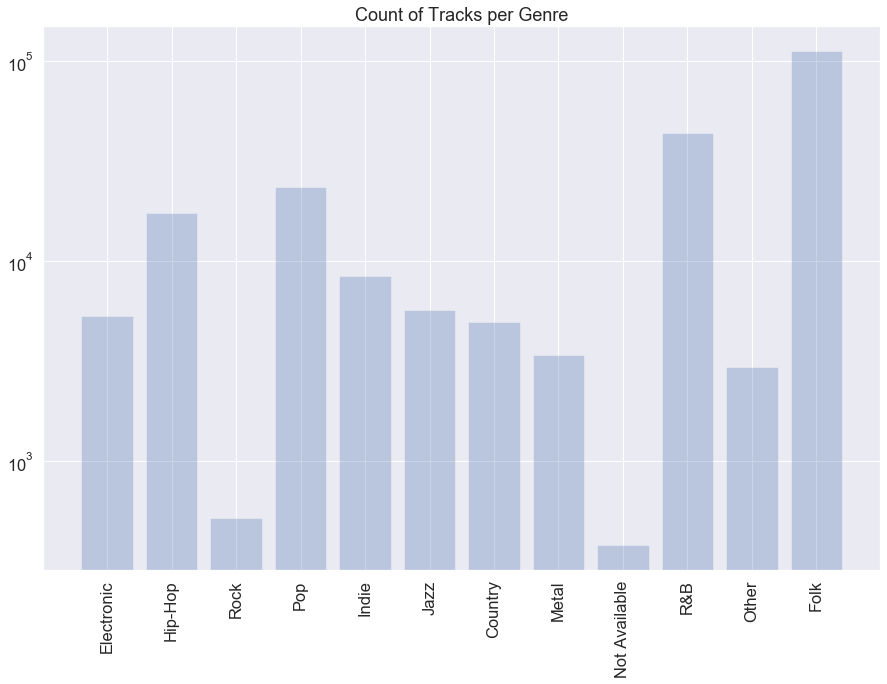

In [83]:
plt.figure(figsize=(15,10))
plt.bar(df_15.genre.unique(), df_15.groupby("genre").artisttrack.count(), alpha=0.3)
plt.title('Count of Tracks per Genre')
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()

In [84]:
df_15.to_pickle("df_15.pkl")

# Adding Features Based on Lyrics

In [2]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
#nltk.download('punkt')

In [3]:
#nltk.download('stopwords')

In [4]:
#df_15 = pd.read_pickle("df_15.pkl")

In [5]:
songart_df = df_15.copy()

In [6]:
songart_df = songart_df[['artisttrack', 'lyrics']]

In [7]:
songart_df = songart_df.drop_duplicates().reset_index(drop=True)

In [8]:
songart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39741 entries, 0 to 39740
Data columns (total 2 columns):
artisttrack    39741 non-null object
lyrics         39741 non-null object
dtypes: object(2)
memory usage: 621.1+ KB


In [9]:
songart_df['lyricz'] = songart_df['lyrics'].apply(word_tokenize)

In [10]:
songart_df['lyricz'][:10]

0      [aerodynamics, aerodynamics, aerodynamics, ...]
1    [dafunk, back, to, the, punk, come, on, dafunk...
2    [do, n't, wan, na, let, you, go, i, 'm, stayin...
3    [work, it, make, it, do, it, make, us, harder,...
4    [paaaaam, ponnnn, paaaaaaaaam, ponnnnnnnn, paa...
5    [{, stop, the, music, and, go, home, i, repeat...
6    [boom, boom, boom, boom, boom, duh, du-duh, po...
7    [rock, ., robot, rock, ., rock, ., robot, rock...
8    [it, might, not, be, the, right, time, i, migh...
9    [paul, jonson, dj, funk, dj, skull, ?, dj, rus...
Name: lyricz, dtype: object

In [11]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [12]:
punct = word_tokenize(string.punctuation)

In [13]:
stop_words = list(set(stopwords.words('english')))

In [14]:
stop_w = stop_words + punct + \
    ["'m", "n't", "'s", "'ll", "wan", "gon", "na", "'re", "wo", "l", "ca", \
         "'d", "ai", "'ve", "i"] 

In [15]:
for num in range(len(songart_df.lyricz)):
    songart_df.lyricz[num] = [x for x in songart_df.lyricz[num] if x not in stop_w]

In [16]:
for num in range(len(songart_df.lyricz)):
    songart_df["lyricz"][num] = [x for x in songart_df.lyricz[num] if len(x) > 2]

In [17]:
for num in range(len(songart_df.lyricz)): 
    songart_df.lyricz[num] = [x for x in songart_df.lyricz[num] if x.isalpha()]

In [18]:
songart_df['lyricz'][:30]

0            [aerodynamics, aerodynamics, aerodynamics]
1     [dafunk, back, punk, come, dafunk, back, punk,...
2     [let, staying, side, wish, time, standing, sti...
3     [work, make, make, harder, better, faster, str...
4     [paaaaam, ponnnn, paaaaaaaaam, ponnnnnnnn, paa...
5        [stop, music, home, repeat, stop, music, home]
6       [boom, boom, boom, boom, boom, duh, poooooooom]
7     [rock, robot, rock, rock, robot, rock, rock, r...
8     [might, right, time, might, right, one, someth...
9     [paul, jonson, funk, skull, rush, waxmaster, h...
10    [buy, use, break, fix, trash, change, mail, up...
11    [television, rules, nation, television, rules,...
12    [brainwasher, brainwasher, brainwasher, brainw...
13    [prime, time, life, prime, time, life, prime, ...
14    [much, long, feel, coming, feeling, getting, s...
15                             [baby, hot, first, love]
16    [yeah, never, alone, walk, streets, peek, day,...
17    [fall, sequence, eating, young, remain, si

In [19]:
songart_df['lyricz'][-30:]

39711    [woke, got, lazy, ass, bed, watered, rocks, gr...
39712    [hey, kid, time, come, change, though, need, n...
39713    [got, get, away, got, get, away, thinkers, dri...
39714    [baby, something, mind, tonight, reason, belie...
39715    [sometimes, think, silly, things, easy, time, ...
39716    [met, jane, center, earth, dark, dirt, around,...
39717    [seen, land, forgotten, brought, candle, mind,...
39718    [head, rush, come, take, stage, blow, listen, ...
39719    [country, house, windows, lit, burning, wicks,...
39720    [sing, wondrous, love, jesus, sing, mercy, gra...
39721    [stop, killing, songs, like, look, eyes, beat,...
39722    [listen, sound, hope, children, voices, asking...
39723    [last, sleepless, ones, left, behind, left, be...
39724    [caught, another, one, say, love, broke, anoth...
39725    [money, talks, listen, money, talks, dirty, ca...
39726    [say, back, way, trouble, makers, better, fix,...
39727    [sweet, indian, maiden, since, first, met, for.

In [20]:
songart_df['top_word'] = np.zeros(39741)

In [21]:
songart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39741 entries, 0 to 39740
Data columns (total 4 columns):
artisttrack    39741 non-null object
lyrics         39741 non-null object
lyricz         39741 non-null object
top_word       39741 non-null float64
dtypes: float64(1), object(3)
memory usage: 1.2+ MB


In [22]:
from collections import Counter

for num in range(len(songart_df.lyricz)):
    songart_df['top_word'][num] = [word for word,count in Counter(songart_df.lyricz[num]).most_common(5)]

C:\Users\zvnow\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\zvnow\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [23]:
songart_df["top_word"]

0                                           [aerodynamics]
1                               [dafunk, back, punk, come]
2                        [let, amazing, pass, miss, thing]
3                      [work, make, harder, faster, makes]
4        [paaaaaaaaam, paaaaaaaam, ponnnnnnn, paaaaam, ...
                               ...                        
39736           [give, fucking, mesopotamia, creeps, city]
39737                       [coming, back, day, miss, way]
39738                      [like, upon, air, wooh, traces]
39739                 [lose, come, give, want, everything]
39740                  [came, world, light, every, people]
Name: top_word, Length: 39741, dtype: object

In [24]:
songart_df['top_lyr'] = songart_df['top_word'].apply(lambda x: " ".join(x))

In [25]:
len(songart_df['top_lyr'])

39741

In [27]:
songart_df['str_lyr'] = songart_df['lyricz'].apply(lambda x: " ".join(x))

In [28]:
len(songart_df['str_lyr'])

39741

# Adding Lyric Sentiment

In [ ]:
#!pip install vaderSentiment

In [29]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyser = SentimentIntensityAnalyzer()

In [30]:
len(songart_df.str_lyr.tolist())

39741

In [31]:
Sentiment =[]
for text in songart_df.str_lyr.tolist():
    Sentiment.append(analyser.polarity_scores(text))

In [32]:
sentiment_df = pd.DataFrame(Sentiment) 

In [33]:
songart_df = pd.concat([songart_df, sentiment_df], axis=1)

In [41]:
songart_df.head(30)

,artisttrack,lyrics,lyricz,top_word,top_lyr,str_lyr,neg,neu,pos,compound
0,daftpunk aerodynamic,aerodynamics aerodynamics aerodynamics ...,"[aerodynamics, aerodynamics, aerodynamics]",[aerodynamics],aerodynamics,aerodynamics aerodynamics aerodynamics,0.000,1.000,0.000,0.0000
1,daftpunk daftendirekt,dafunk back to the punk come on dafunk back to...,"[dafunk, back, punk, come, dafunk, back, punk,...","[dafunk, back, punk, come]",dafunk back punk come,dafunk back punk come dafunk back punk come da...,0.000,1.000,0.000,0.0000
2,daftpunk derezzed,don't wanna let you go i'm staying here by you...,"[let, staying, side, wish, time, standing, sti...","[let, amazing, pass, miss, thing]",let amazing pass miss thing,let staying side wish time standing still clos...,0.067,0.419,0.514,0.9930
3,daftpunk harderbetterfasterstronger,work it make it do it make us harder better fa...,"[work, make, make, harder, better, faster, str...","[work, make, harder, faster, makes]",work make harder faster makes,work make make harder better faster stronger h...,0.000,0.621,0.379,0.9958
4,daftpunk highlife,paaaaam ponnnn paaaaaaaaam ponnnnnnnn paaaaaaa...,"[paaaaam, ponnnn, paaaaaaaaam, ponnnnnnnn, paa...","[paaaaaaaaam, paaaaaaaam, ponnnnnnn, paaaaam, ...",paaaaaaaaam paaaaaaaam ponnnnnnn paaaaam ponnnn,paaaaam ponnnn paaaaaaaaam ponnnnnnnn paaaaaaa...,0.000,1.000,0.000,0.0000
5,daftpunk revolution909,{stop the music and go home i repeat stop the ...,"[stop, music, home, repeat, stop, music, home]","[stop, music, home, repeat]",stop music home repeat,stop music home repeat stop music home,0.468,0.532,0.000,-0.5267
6,daftpunk rinzler,boom boom boom boom boom duh du-duh poooooooom,"[boom, boom, boom, boom, boom, duh, poooooooom]","[boom, duh, poooooooom]",boom duh poooooooom,boom boom boom boom boom duh poooooooom,0.000,1.000,0.000,0.0000
7,daftpunk robotrock,rock. robot rock. rock. robot rock. rock. robo...,"[rock, robot, rock, rock, robot, rock, rock, r...","[rock, robot]",rock robot,rock robot rock rock robot rock rock robot roc...,0.000,1.000,0.000,0.0000
8,daftpunk somethingaboutus,it might not be the right time i might not be ...,"[might, right, time, might, right, one, someth...","[might, right, life, something, time]",might right life something time,might right time might right one something wan...,0.038,0.667,0.295,0.8689
9,daftpunk teachers,paul jonson dj funk dj skull? dj rush waxmaste...,"[paul, jonson, funk, skull, rush, waxmaster, h...","[house, kevin, carol, yeah, carter]",house kevin carol yeah carter,paul jonson funk skull rush waxmaster hyperact...,0.073,0.879,0.048,-0.5106


In [42]:
songart_df.tail(30)

,artisttrack,lyrics,lyricz,top_word,top_lyr,str_lyr,neg,neu,pos,compound
39711,fiveforfighting disneyland,i woke up got my lazy ass out of bed i watered...,"[woke, got, lazy, ass, bed, watered, rocks, gr...","[day, wake, disneyland, nice, got]",day wake disneyland nice got,woke got lazy ass bed watered rocks growing he...,0.098,0.631,0.271,0.9794
39712,fiveforfighting ifgodmadeyou,hey kid your time has come to change though i ...,"[hey, kid, time, come, change, though, need, n...","[love, something, inside, hey, sunset]",love something inside hey sunset,hey kid time come change though need needed an...,0.065,0.573,0.362,0.9962
39713,fiveforfighting nycweatherreport,"got to get away from here, got to get away fro...","[got, get, away, got, get, away, thinkers, dri...","[got, get, away, sit, back]",got get away sit back,got get away got get away thinkers drinking th...,0.054,0.539,0.407,0.9927
39714,fiveforfighting onemoreforlove,baby there's something on my mind tonight ther...,"[baby, something, mind, tonight, reason, belie...","[love, one, tonight, roll, mind]",love one tonight roll mind,baby something mind tonight reason believe alm...,0.090,0.440,0.470,0.9961
39715,fiveforfighting roadtoheaven,sometimes i think about silly things it's easy...,"[sometimes, think, silly, things, easy, time, ...","[road, heaven, would, made, one]",road heaven would made one,sometimes think silly things easy time often h...,0.042,0.688,0.271,0.9917
39716,fiveforfighting thedevilinthewishingwell,i met jane at the center of the earth it was d...,"[met, jane, center, earth, dark, dirt, around,...","[make, jane, long, way, says]",make jane long way says,met jane center earth dark dirt around gather ...,0.162,0.586,0.252,0.9254
39717,fiveforfighting thetaste,so i seen her in a land that was forgotten she...,"[seen, land, forgotten, brought, candle, mind,...","[got, still, taste, time, could]",got still taste time could,seen land forgotten brought candle mind got ea...,0.093,0.676,0.231,0.9423
39718,311 sicktight,"head rush, come on, we take the stage what's u...","[head, rush, come, take, stage, blow, listen, ...","[keep, know, get, sick, tight]",keep know get sick tight,head rush come take stage blow listen take mou...,0.198,0.628,0.175,-0.8246
39719,deltarae countryhouse,in a country house with the windows lit by bur...,"[country, house, windows, lit, burning, wicks,...","[lonesome, ever, country, house, windows]",lonesome ever country house windows,country house windows lit burning wicks walls ...,0.311,0.560,0.129,-0.9423
39720,bradpaisley whenweallgettoheaven,sing the wondrous love of jesus sing his mercy...,"[sing, wondrous, love, jesus, sing, mercy, gra...","[sing, chorus, jesus, soon, wondrous]",sing chorus jesus soon wondrous,sing wondrous love jesus sing mercy grace mans...,0.000,0.539,0.461,0.9843


In [43]:
songart_df.to_pickle("songart_df.pkl")

# Adding Lyric Similarity

In [2]:
#songart_df = pd.read_pickle("songart_df.pkl")

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
tfidf = TfidfVectorizer()

In [5]:
tfidf_matrix = tfidf.fit_transform(songart_df['top_lyr'])

In [6]:
tfidf_matrix.shape

(39741, 15591)

In [3]:
import pickle

In [18]:
output = open('tfidf_matrix.pkl', 'wb')
pickle.dump(tfidf_matrix, output)
output.close()

In [7]:
#pkl_file = open('tfidf_matrix.pkl', 'rb')
#tfidf_matrix = pickle.load(pkl_file)
#pkl_file.close()

# COSINE SIMILARITY

In [8]:
from sklearn.metrics.pairwise import linear_kernel

In [9]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [10]:
cosine_sim.shape

(39741, 39741)

In [11]:
type(cosine_sim)

numpy.ndarray

In [12]:
cosine_df = pd.DataFrame(cosine_sim.astype('float32'))

In [14]:
cosine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39741 entries, 0 to 39740
Columns: 39741 entries, 0 to 39740
dtypes: float32(39741)
memory usage: 5.9 GB


In [ ]:
cosine_df.head()

In [ ]:
cosine_df.to_pickle('cosine_df.pkl')

In [ ]:
#cosine_df = pd.read_pickle('cosine_df.pkl')

# PCA ON LYRIC SIMILARITY

In [ ]:
from sklearn.decomposition import PCA

pca_res = PCA(n_components=250)

feat = pca_res.fit_transform(cosine_df)    

print(
    'The percentage of total variance in the dataset explained by the',
    'components from Sklearn PCA.\n',
    np.sum(pca_res.explained_variance_ratio_)
)

The percentage of total variance in the dataset explained by the components from Sklearn PCA.
 0.9017206727921918

In [ ]:
pca_df = pd.DataFrame(feat)

In [ ]:
pca_df.info()

In [ ]:
pca_df.to_pickle('pca_df.pkl')

# Umap for Additional Feature Reduction

In [4]:
#pca_df = pd.read_pickle('pca_df.pkl')

In [2]:
import umap

In [ ]:
umap_result = umap.UMAP(n_neighbors=500, min_dist=0.1,\
                        n_components=50, random_state=42).fit_transform(pca_df)

In [6]:
umap_df = pd.DataFrame(umap_result)

In [7]:
umap_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39741 entries, 0 to 39740
Data columns (total 50 columns):
0     39741 non-null float32
1     39741 non-null float32
2     39741 non-null float32
3     39741 non-null float32
4     39741 non-null float32
5     39741 non-null float32
6     39741 non-null float32
7     39741 non-null float32
8     39741 non-null float32
9     39741 non-null float32
10    39741 non-null float32
11    39741 non-null float32
12    39741 non-null float32
13    39741 non-null float32
14    39741 non-null float32
15    39741 non-null float32
16    39741 non-null float32
17    39741 non-null float32
18    39741 non-null float32
19    39741 non-null float32
20    39741 non-null float32
21    39741 non-null float32
22    39741 non-null float32
23    39741 non-null float32
24    39741 non-null float32
25    39741 non-null float32
26    39741 non-null float32
27    39741 non-null float32
28    39741 non-null float32
29    39741 non-null float32
30    39741 non-null 

In [8]:
umap_df.to_pickle('umap_df.pkl')

In [ ]:
#umap_df = pd.read_pickle('umap_df.pkl')

## Adding Reduced Similarity Matrix to SongArt DF

In [10]:
#songart_df = pd.read_pickle("songart_df.pkl")

In [12]:
songart_fin_u = pd.concat([songart_df, umap_df], axis=1)

In [13]:
songart_fin_u.head()

,artisttrack,lyrics,lyricz,top_word,top_lyr,str_lyr,neg,neu,pos,compound,...,40,41,42,43,44,45,46,47,48,49
0,daftpunk aerodynamic,aerodynamics aerodynamics aerodynamics ...,"[aerodynamics, aerodynamics, aerodynamics]",[aerodynamics],aerodynamics,aerodynamics aerodynamics aerodynamics,0.000,1.000,0.000,0.0000,...,0.846413,-0.165173,-0.592939,-1.826522,0.161975,-0.825397,-0.256656,-0.170736,-1.407219,0.657422
1,daftpunk daftendirekt,dafunk back to the punk come on dafunk back to...,"[dafunk, back, punk, come, dafunk, back, punk,...","[dafunk, back, punk, come]",dafunk back punk come,dafunk back punk come dafunk back punk come da...,0.000,1.000,0.000,0.0000,...,0.031857,0.005962,-0.215646,-0.323425,0.021565,-0.135951,0.055183,0.092350,0.170830,0.119207
2,daftpunk derezzed,don't wanna let you go i'm staying here by you...,"[let, staying, side, wish, time, standing, sti...","[let, amazing, pass, miss, thing]",let amazing pass miss thing,let staying side wish time standing still clos...,0.067,0.419,0.514,0.9930,...,0.032748,0.016150,-0.254755,-0.244914,-0.009818,-0.166425,0.048398,0.094954,-0.180260,-0.046125
3,daftpunk harderbetterfasterstronger,work it make it do it make us harder better fa...,"[work, make, make, harder, better, faster, str...","[work, make, harder, faster, makes]",work make harder faster makes,work make make harder better faster stronger h...,0.000,0.621,0.379,0.9958,...,-0.026953,-0.154410,0.016905,-0.520896,0.120695,-0.163615,-0.078094,0.007833,-0.411745,0.062006
4,daftpunk highlife,paaaaam ponnnn paaaaaaaaam ponnnnnnnn paaaaaaa...,"[paaaaam, ponnnn, paaaaaaaaam, ponnnnnnnn, paa...","[paaaaaaaaam, paaaaaaaam, ponnnnnnn, paaaaam, ...",paaaaaaaaam paaaaaaaam ponnnnnnn paaaaam ponnnn,paaaaam ponnnn paaaaaaaaam ponnnnnnnn paaaaaaa...,0.000,1.000,0.000,0.0000,...,0.831682,-0.165577,-0.591194,-1.813664,0.160609,-0.830005,-0.251823,-0.174766,-1.397212,0.646858


In [14]:
songart_fin_u.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39741 entries, 0 to 39740
Data columns (total 60 columns):
artisttrack    39741 non-null object
lyrics         39741 non-null object
lyricz         39741 non-null object
top_word       39741 non-null object
top_lyr        39741 non-null object
str_lyr        39741 non-null object
neg            39741 non-null float64
neu            39741 non-null float64
pos            39741 non-null float64
compound       39741 non-null float64
0              39741 non-null float32
1              39741 non-null float32
2              39741 non-null float32
3              39741 non-null float32
4              39741 non-null float32
5              39741 non-null float32
6              39741 non-null float32
7              39741 non-null float32
8              39741 non-null float32
9              39741 non-null float32
10             39741 non-null float32
11             39741 non-null float32
12             39741 non-null float32
13             39741 no

In [15]:
songart_fin_u.to_pickle("songart_fin_u.pkl")

# Creating Numerical Columns

In [2]:
#num_df = pd.read_pickle("songart_fin_u.pkl")

In [16]:
num_df_u = songart_fin_u.copy()

In [17]:
num_df_u.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39741 entries, 0 to 39740
Data columns (total 60 columns):
artisttrack    39741 non-null object
lyrics         39741 non-null object
lyricz         39741 non-null object
top_word       39741 non-null object
top_lyr        39741 non-null object
str_lyr        39741 non-null object
neg            39741 non-null float64
neu            39741 non-null float64
pos            39741 non-null float64
compound       39741 non-null float64
0              39741 non-null float32
1              39741 non-null float32
2              39741 non-null float32
3              39741 non-null float32
4              39741 non-null float32
5              39741 non-null float32
6              39741 non-null float32
7              39741 non-null float32
8              39741 non-null float32
9              39741 non-null float32
10             39741 non-null float32
11             39741 non-null float32
12             39741 non-null float32
13             39741 no

In [18]:
num_df_u = num_df_u.drop(['lyrics','lyricz','top_word','top_lyr','str_lyr'], axis=1)

In [19]:
num_df_u.head()

,artisttrack,neg,neu,pos,compound,0,1,2,3,4,...,40,41,42,43,44,45,46,47,48,49
0,daftpunk aerodynamic,0.000,1.000,0.000,0.0000,0.763144,2.544889,1.198370,0.320746,0.290322,...,0.846413,-0.165173,-0.592939,-1.826522,0.161975,-0.825397,-0.256656,-0.170736,-1.407219,0.657422
1,daftpunk daftendirekt,0.000,1.000,0.000,0.0000,0.021499,0.406669,0.157056,0.027755,-0.057074,...,0.031857,0.005962,-0.215646,-0.323425,0.021565,-0.135951,0.055183,0.092350,0.170830,0.119207
2,daftpunk derezzed,0.067,0.419,0.514,0.9930,0.129016,0.257349,0.109730,-0.044162,0.005569,...,0.032748,0.016150,-0.254755,-0.244914,-0.009818,-0.166425,0.048398,0.094954,-0.180260,-0.046125
3,daftpunk harderbetterfasterstronger,0.000,0.621,0.379,0.9958,0.182194,0.972179,0.624294,0.081950,0.163209,...,-0.026953,-0.154410,0.016905,-0.520896,0.120695,-0.163615,-0.078094,0.007833,-0.411745,0.062006
4,daftpunk highlife,0.000,1.000,0.000,0.0000,0.760171,2.525181,1.189567,0.315996,0.289982,...,0.831682,-0.165577,-0.591194,-1.813664,0.160609,-0.830005,-0.251823,-0.174766,-1.397212,0.646858


In [20]:
#df_15 = pd.read_pickle("df_15.pkl")

In [21]:
df_15.head()

,user,artist_x,track,playlist,userplaylist,artisttrack,genre,lyrics
0,07f0fc3be95dcd878966b1f9572ff670,daftpunk,aerodynamic,daftpunk,07f0fc3be95dcd878966b1f9572ff670 daftpunk,daftpunk aerodynamic,Electronic,aerodynamics aerodynamics aerodynamics ...
1,07f0fc3be95dcd878966b1f9572ff670,daftpunk,daftendirekt,daftpunk,07f0fc3be95dcd878966b1f9572ff670 daftpunk,daftpunk daftendirekt,Electronic,dafunk back to the punk come on dafunk back to...
2,07f0fc3be95dcd878966b1f9572ff670,daftpunk,derezzed,daftpunk,07f0fc3be95dcd878966b1f9572ff670 daftpunk,daftpunk derezzed,Electronic,don't wanna let you go i'm staying here by you...
3,07f0fc3be95dcd878966b1f9572ff670,daftpunk,harderbetterfasterstronger,daftpunk,07f0fc3be95dcd878966b1f9572ff670 daftpunk,daftpunk harderbetterfasterstronger,Electronic,work it make it do it make us harder better fa...
4,07f0fc3be95dcd878966b1f9572ff670,daftpunk,highlife,daftpunk,07f0fc3be95dcd878966b1f9572ff670 daftpunk,daftpunk highlife,Electronic,paaaaam ponnnn paaaaaaaaam ponnnnnnnn paaaaaaa...


In [22]:
num_df_u = pd.merge(num_df_u, df_15[['artist_x','track','artisttrack', 'genre']].drop_duplicates(), on=['artisttrack'], how='left')

In [23]:
num_df_u.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39741 entries, 0 to 39740
Data columns (total 58 columns):
artisttrack    39741 non-null object
neg            39741 non-null float64
neu            39741 non-null float64
pos            39741 non-null float64
compound       39741 non-null float64
0              39741 non-null float32
1              39741 non-null float32
2              39741 non-null float32
3              39741 non-null float32
4              39741 non-null float32
5              39741 non-null float32
6              39741 non-null float32
7              39741 non-null float32
8              39741 non-null float32
9              39741 non-null float32
10             39741 non-null float32
11             39741 non-null float32
12             39741 non-null float32
13             39741 non-null float32
14             39741 non-null float32
15             39741 non-null float32
16             39741 non-null float32
17             39741 non-null float32
18             397

In [ ]:
num_df_u.head()

In [24]:
num_cols = ['artist_x','track','artisttrack','genre']

In [25]:
for col in num_cols:
    num_df_u[col] = num_df_u[col].astype('category')

In [26]:
col_dict_sum_u = {}
for col in num_cols:
    col_dict_sum_u[col] = dict(enumerate(num_df_u[col].cat.categories))
    num_df_u[col] = num_df_u[col].cat.codes

In [ ]:
col_dict_sum_u

In [28]:
num_df_u

,artisttrack,neg,neu,pos,compound,0,1,2,3,4,...,43,44,45,46,47,48,49,artist_x,track,genre
0,21946,0.000,1.000,0.000,0.0000,0.763144,2.544889,1.198370,0.320746,0.290322,...,-1.826522,0.161975,-0.825397,-0.256656,-0.170736,-1.407219,0.657422,2089,470,1
1,21950,0.000,1.000,0.000,0.0000,0.021499,0.406669,0.157056,0.027755,-0.057074,...,-0.323425,0.021565,-0.135951,0.055183,0.092350,0.170830,0.119207,2089,6019,1
2,21951,0.067,0.419,0.514,0.9930,0.129016,0.257349,0.109730,-0.044162,0.005569,...,-0.244914,-0.009818,-0.166425,0.048398,0.094954,-0.180260,-0.046125,2089,6540,1
3,21959,0.000,0.621,0.379,0.9958,0.182194,0.972179,0.624294,0.081950,0.163209,...,-0.520896,0.120695,-0.163615,-0.078094,0.007833,-0.411745,0.062006,2089,10842,1
4,21961,0.000,1.000,0.000,0.0000,0.760171,2.525181,1.189567,0.315996,0.289982,...,-1.813664,0.160609,-0.830005,-0.251823,-0.174766,-1.397212,0.646858,2089,11479,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39736,11071,0.134,0.778,0.089,-0.7800,0.476121,1.318989,0.962510,0.207029,0.310770,...,-0.941777,0.208610,-0.303950,-0.147342,-0.361035,-0.473268,0.278100,1052,17162,11
39737,32542,0.268,0.677,0.055,-0.9526,0.146776,0.755602,0.475615,0.116754,0.108049,...,-0.519452,0.102951,-0.274653,-0.065137,-0.205669,-0.141400,0.268240,3097,17473,11
39738,4840,0.084,0.531,0.386,0.9903,-0.095879,0.090946,-0.211939,-0.180003,-0.208698,...,-0.202964,-0.048699,-0.127934,0.166927,0.207206,-0.052571,-0.088042,488,29057,7
39739,12858,0.342,0.553,0.105,-0.9683,0.035844,0.613933,0.284263,0.057883,0.004476,...,-0.117558,0.039371,-0.119607,0.020355,-0.072557,-0.143880,0.224013,1198,31104,1


In [29]:
num_df_u.to_pickle("num_df_u.pkl")

In [30]:
import pickle
output = open('col_dict_sum_u.pkl', 'wb')
pickle.dump(col_dict_sum_u, output)
output.close()

# Scaling

In [31]:
from sklearn.preprocessing import MinMaxScaler
import pickle

In [32]:
scaler = MinMaxScaler()
X_std_u = scaler.fit_transform(num_df_u)

In [33]:
X_std_u = pd.DataFrame(X_std_u)

In [34]:
X_std_u

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.552365,0.000,1.000,0.000,0.500000,0.059848,0.992874,0.899432,0.970085,0.184152,...,0.009003,0.697225,0.185380,0.588565,0.642524,0.032926,0.872167,0.541753,0.014516,0.090909
1,0.552465,0.000,1.000,0.000,0.500000,0.035109,0.848724,0.733007,0.946247,0.069515,...,0.571390,0.495036,0.451422,0.858602,0.838292,0.889623,0.494045,0.541753,0.185904,0.090909
2,0.552490,0.067,0.419,0.514,0.996550,0.038696,0.838657,0.725443,0.940396,0.090187,...,0.600765,0.449846,0.439663,0.852726,0.840229,0.699022,0.377891,0.541753,0.201995,0.090909
3,0.552692,0.000,0.621,0.379,0.997950,0.040470,0.886848,0.807682,0.950656,0.142206,...,0.497506,0.637783,0.440747,0.743191,0.775401,0.573353,0.453859,0.541753,0.334867,0.090909
4,0.552742,0.000,1.000,0.000,0.500000,0.059748,0.991545,0.898025,0.969698,0.184040,...,0.013814,0.695257,0.183602,0.592751,0.639525,0.038358,0.864745,0.541753,0.354542,0.090909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39736,0.278649,0.134,0.778,0.089,0.109961,0.050274,0.910229,0.861736,0.960833,0.190900,...,0.340032,0.764378,0.386595,0.683226,0.500917,0.539953,0.605675,0.272822,0.530068,1.000000
39737,0.819058,0.268,0.677,0.055,0.023652,0.039288,0.872247,0.783920,0.953488,0.124004,...,0.498046,0.612231,0.397900,0.754410,0.616529,0.720118,0.598747,0.803164,0.539673,1.000000
39738,0.121819,0.084,0.531,0.386,0.995200,0.031194,0.827439,0.674034,0.929344,0.019480,...,0.616461,0.393858,0.454515,0.955366,0.923759,0.768343,0.348443,0.126556,0.897458,0.636364
39739,0.323626,0.342,0.553,0.105,0.015802,0.035588,0.862697,0.753338,0.948698,0.089826,...,0.648416,0.520677,0.457729,0.828442,0.715581,0.718772,0.567676,0.310685,0.960682,0.090909


In [36]:
X_std_u.to_pickle('X_std_u_lyrics.pkl')

In [2]:
#X_std_u = pd.read_pickle('X_std_u_lyrics.pkl')

# Baseline Clustering

In [3]:
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

from sklearn import metrics

In [4]:
import hdbscan

In [5]:
from sklearn.neighbors import NearestNeighbors

In [7]:
neigh = NearestNeighbors(n_neighbors=50)

nbrs = neigh.fit(X_std_u)

distances, indices = nbrs.kneighbors(X_std_u)

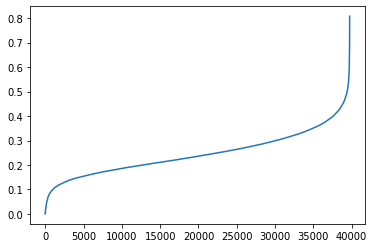

In [8]:
distances = np.sort(distances, axis=0)

distances = distances[:,1]

plt.plot(distances)
plt.show()

In [9]:
neigh = NearestNeighbors(n_neighbors=100)

nbrs = neigh.fit(X_std_u)

distances, indices = nbrs.kneighbors(X_std_u)

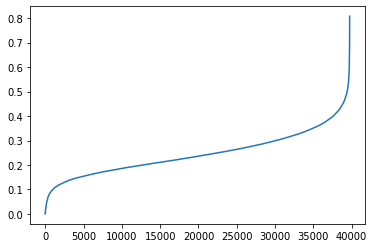

In [10]:
distances = np.sort(distances, axis=0)

distances = distances[:,1]

plt.plot(distances)
plt.show()

In [11]:
neigh = NearestNeighbors(n_neighbors=100, metric='manhattan')

nbrs = neigh.fit(X_std_u)

distances, indices = nbrs.kneighbors(X_std_u)

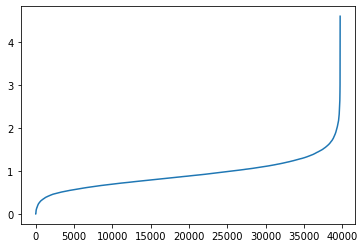

In [12]:
distances = np.sort(distances, axis=0)

distances = distances[:,1]

plt.plot(distances)
plt.show()

In [13]:
neigh = NearestNeighbors(n_neighbors=100, metric='cosine')

nbrs = neigh.fit(X_std_u)

distances, indices = nbrs.kneighbors(X_std_u)

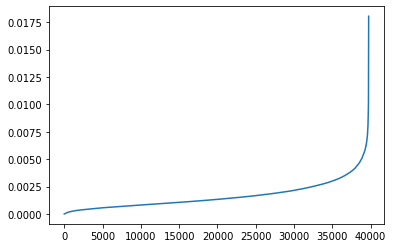

In [14]:
distances = np.sort(distances, axis=0)

distances = distances[:,1]

plt.plot(distances)
plt.show()

### DBSCAN

In [6]:
labels_h = DBSCAN(eps=0.4, min_samples=50).fit(X_std_u)  

In [7]:
n_clusters = len(set(labels_h.labels_)) - (1 if -1 in labels_h.labels_ else 0)
print('Estimated number of clusters: %d' % n_clusters) 

Estimated number of clusters: 29


In [8]:
print("The silhouette score of the DBSCAN solution: {}"
      .format(metrics.silhouette_score(X_std_u, labels_h.labels_, metric='euclidean')))

The silhouette score of the DBSCAN solution: -0.17013721135261067


In [9]:
labels_hm = DBSCAN(eps=1.5, min_samples=50, metric='manhattan').fit(X_std_u)  

In [10]:
n_clusters = len(set(labels_hm.labels_)) - (1 if -1 in labels_hm.labels_ else 0)
print('Estimated number of clusters: %d' % n_clusters) 

Estimated number of clusters: 37


In [11]:
print("The silhouette score of the DBSCAN solution: {}"
      .format(metrics.silhouette_score(X_std_u, labels_hm.labels_, metric='manhattan')))

The silhouette score of the DBSCAN solution: -0.11472752367979468


In [12]:
labels_hc = DBSCAN(eps=0.0035, min_samples=50, metric='cosine').fit(X_std_u)  

In [13]:
n_clusters = len(set(labels_hc.labels_)) - (1 if -1 in labels_hc.labels_ else 0)
print('Estimated number of clusters: %d' % n_clusters) 

Estimated number of clusters: 24


In [14]:
print("The silhouette score of the DBSCAN solution: {}"
      .format(metrics.silhouette_score(X_std_u, labels_hc.labels_, metric='cosine')))

The silhouette score of the DBSCAN solution: -0.31415514886226376


### HDBSCAN

In [15]:
h_labels = hdbscan.HDBSCAN(min_samples=10, min_cluster_size=100, metric='manhattan').fit(X_std_u)

In [16]:
n_clusters = len(set(h_labels.labels_)) - (1 if -1 in h_labels.labels_ else 0)
print('Estimated number of clusters: %d' % n_clusters) 

Estimated number of clusters: 4


In [17]:
print("Silhouette score of HDBSCAN: {}".format(
    metrics.silhouette_score(X_std_u, h_labels.labels_, metric='manhattan')))

Silhouette score of HDBSCAN: 0.15188418454398261


# RBM 

In [18]:
from sklearn.neural_network import BernoulliRBM

In [19]:
RBM = BernoulliRBM(n_components=25, learning_rate=0.001, n_iter=20, batch_size=39741,verbose=True, random_state=42)

In [20]:
RBM.fit(X_std_u)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -40.23, time = 0.31s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -40.21, time = 0.58s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -40.20, time = 0.58s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -40.18, time = 0.58s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -40.17, time = 0.56s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -40.15, time = 0.58s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -40.14, time = 0.56s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -40.12, time = 0.52s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -40.11, time = 0.56s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -40.09, time = 0.52s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -40.08, time = 0.48s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -40.06, time = 0.56s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -40.05, time = 0.61s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -40.03, time = 0.59s
[BernoulliRBM] Iteration 15, 

BernoulliRBM(batch_size=39741, learning_rate=0.001, n_components=25, n_iter=20,
             random_state=42, verbose=True)

In [21]:
X_std2u = RBM.transform(X_std_u)

In [22]:
X_std2u.shape

(39741, 25)

# Testing usefullness of RBM

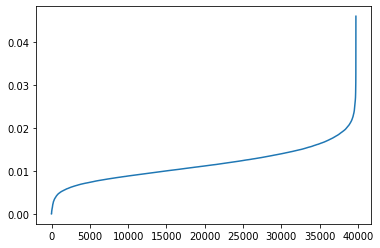

In [23]:
neigh = NearestNeighbors(n_neighbors=100, metric='manhattan')

nbrs = neigh.fit(X_std2u)

distances, indices = nbrs.kneighbors(X_std2u)

distances = np.sort(distances, axis=0)

distances = distances[:,1]

plt.plot(distances)
plt.show()

In [24]:
### DBSCAN

labels_h2 = DBSCAN(eps=0.02, min_samples=50, metric='manhattan').fit(X_std2u) 

In [25]:
n_clusters = len(set(labels_h2.labels_)) - (1 if -1 in labels_h2.labels_ else 0)
print('Estimated number of clusters: %d' % n_clusters) 

Estimated number of clusters: 25


In [26]:
print("The silhouette score of the DBSCAN solution: {}"
      .format(metrics.silhouette_score(X_std2u, labels_h2.labels_, metric='manhattan')))

The silhouette score of the DBSCAN solution: -0.15790238735219642


In [27]:
### HDBSCAN

h_labels2 = hdbscan.HDBSCAN(min_samples=10, min_cluster_size=100, metric='manhattan').fit(X_std2u)

In [28]:
n_clusters_ = len(set(h_labels2.labels_)) - (1 if -1 in h_labels2.labels_ else 0)
print('Estimated number of clusters: %d' % n_clusters) 

Estimated number of clusters: 25


In [29]:
print("Silhouette score of HDBSCAN: {}".format(
    metrics.silhouette_score(X_std2u, h_labels2.labels_, metric='manhattan')))

Silhouette score of HDBSCAN: 0.29727664896921085


# ADVANCED CLUSTERING

### KNNMEANS

In [30]:
### Defining the k-means
kmeans_cluster = KMeans(n_clusters=1100, random_state=42)

### Fit model
y_pred = kmeans_cluster.fit(X_std2u)
yy_pred = y_pred.predict(X_std2u)


print("------------------------------------------------------")

### Defining the k-means
kmeans_cluster_1 = KMeans(n_clusters=390, random_state=42)

### Fit model
y_pred_1 = kmeans_cluster_1.fit(X_std2u)
yy_pred_1 = y_pred_1.predict(X_std2u)


print("------------------------------------------------------")

### Defining the k-means
kmeans_cluster_2 = KMeans(n_clusters=110, random_state=42)

### Fit model
y_pred_2 = kmeans_cluster_2.fit(X_std2u)
yy_pred_2 = y_pred_2.predict(X_std2u)

print("------------------------------------------------------")

### Defining the k-means
kmeans_cluster_3 = KMeans(n_clusters=44, random_state=42)

### Fit model
y_pred_3 = kmeans_cluster_3.fit(X_std2u)
yy_pred_3 = y_pred_3.predict(X_std2u)


------------------------------------------------------
------------------------------------------------------
------------------------------------------------------


In [31]:
print("Silhouette score of KMEANS: {}".format(
    metrics.silhouette_score(X_std2u, yy_pred, metric='euclidean')))


print("Silhouette score of KMEANS1: {}".format(
    metrics.silhouette_score(X_std2u, yy_pred_1, metric='euclidean')))


print("Silhouette score of KMEANS2: {}".format(
    metrics.silhouette_score(X_std2u, yy_pred_2, metric='euclidean')))


print("Silhouette score of KMEANS3: {}".format(
    metrics.silhouette_score(X_std2u, yy_pred_3, metric='euclidean')))

Silhouette score of KMEANS: 0.14725506365582466
Silhouette score of KMEANS1: 0.15743663705931998
Silhouette score of KMEANS2: 0.17165470992567933
Silhouette score of KMEANS3: 0.17082880180199222


### GMM CLUSTER

In [33]:
# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=390, random_state=42, covariance_type="full")

# Fit model
clusters = gmm_cluster.fit(X_std2u)
clustersp = clusters.predict(X_std2u)

print("------------------------------------------------------")

# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=390, random_state=42, covariance_type="tied")

# Fit model
clusters1 = gmm_cluster.fit(X_std2u)
clusters1p = clusters1.predict(X_std2u)

print("------------------------------------------------------")

# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=390, random_state=42, covariance_type="diag")

# Fit model
clusters2 = gmm_cluster.fit(X_std2u)
clusters2p = clusters2.predict(X_std2u)

print("------------------------------------------------------")

# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=390, random_state=42, covariance_type="spherical")

# Fit model
clusters3 = gmm_cluster.fit(X_std2u)
clusters3p = clusters3.predict(X_std2u)

print("------------------------------------------------------")

------------------------------------------------------
------------------------------------------------------
------------------------------------------------------
------------------------------------------------------


In [34]:
print("Silhouette score with covariance_type=full: {}".format(
    metrics.silhouette_score(X_std2u, clustersp, metric='euclidean')))

print("Silhouette score with covariance_type=tied: {}".format(
    metrics.silhouette_score(X_std2u, clusters1p, metric='euclidean')))

print("Silhouette score with covariance_type=diag: {}".format(
    metrics.silhouette_score(X_std2u, clusters2p, metric='euclidean')))

print("Silhouette score with covariance_type=spherical: {}".format(
    metrics.silhouette_score(X_std2u, clusters3p, metric='euclidean')))

Silhouette score with covariance_type=full: 0.045922192141078906
Silhouette score with covariance_type=tied: 0.043921176962731526
Silhouette score with covariance_type=diag: 0.1581318509440293
Silhouette score with covariance_type=spherical: 0.15895851967975655


# GMM AND KNNMEANS WITHOUT RBM FEATURES

## KNNMEANS

In [35]:
### Defining the k-means
k1means_cluster = KMeans(n_clusters=1100, random_state=42)

### Fit model
y1_pred = k1means_cluster.fit(X_std_u)
y1y_pred = y1_pred.predict(X_std_u)


print("------------------------------------------------------")

### Defining the k-means
k1means_cluster_1 = KMeans(n_clusters=390, random_state=42)

### Fit model
y1_pred_1 = k1means_cluster_1.fit(X_std_u)
y1y_pred_1 = y1_pred_1.predict(X_std_u)


print("------------------------------------------------------")

### Defining the k-means
k1means_cluster_2 = KMeans(n_clusters=110, random_state=42)

### Fit model
y1_pred_2 = k1means_cluster_2.fit(X_std_u)
y1y_pred_2 = y1_pred_2.predict(X_std_u)

print("------------------------------------------------------")

### Defining the k-means
k1means_cluster_3 = KMeans(n_clusters=44, random_state=42)

### Fit model
y1_pred_3 = k1means_cluster_3.fit(X_std_u)
y1y_pred_3 = y1_pred_3.predict(X_std_u)

------------------------------------------------------
------------------------------------------------------
------------------------------------------------------


In [36]:
print("Silhouette score of KMEANS: {}".format(
    metrics.silhouette_score(X_std_u, y1y_pred, metric='euclidean')))


print("Silhouette score of KMEANS1: {}".format(
    metrics.silhouette_score(X_std_u, y1y_pred_1, metric='euclidean')))


print("Silhouette score of KMEANS2: {}".format(
    metrics.silhouette_score(X_std_u, y1y_pred_2, metric='euclidean')))


print("Silhouette score of KMEANS3: {}".format(
    metrics.silhouette_score(X_std_u, y1y_pred_3, metric='euclidean')))

Silhouette score of KMEANS: 0.14859945181268522
Silhouette score of KMEANS1: 0.15936968848876715
Silhouette score of KMEANS2: 0.17559251844639756
Silhouette score of KMEANS3: 0.1815083872268078


## GMM

In [37]:
# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=390, random_state=42, covariance_type="full")

# Fit model
c1lusters = gmm_cluster.fit(X_std_u)
c1lustersp = c1lusters.predict(X_std_u)

print("------------------------------------------------------")

# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=390, random_state=42, covariance_type="tied")

# Fit model
c1lusters1 = gmm_cluster.fit(X_std_u)
c1lusters1p = c1lusters1.predict(X_std_u)

print("------------------------------------------------------")

# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=390, random_state=42, covariance_type="diag")

# Fit model
c1lusters2 = gmm_cluster.fit(X_std_u)
c1lusters2p = c1lusters2.predict(X_std_u)

print("------------------------------------------------------")

# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=390, random_state=42, covariance_type="spherical")

# Fit model
c1lusters3 = gmm_cluster.fit(X_std_u)
c1lusters3p = c1lusters3.predict(X_std_u)

print("------------------------------------------------------")

------------------------------------------------------
------------------------------------------------------
------------------------------------------------------
------------------------------------------------------


In [38]:
print("Silhouette score with covariance_type=full: {}".format(
    metrics.silhouette_score(X_std_u, c1lustersp, metric='euclidean')))

print("Silhouette score with covariance_type=tied: {}".format(
    metrics.silhouette_score(X_std_u, c1lusters1p, metric='euclidean')))

print("Silhouette score with covariance_type=diag: {}".format(
    metrics.silhouette_score(X_std_u, c1lusters2p, metric='euclidean')))

print("Silhouette score with covariance_type=spherical: {}".format(
    metrics.silhouette_score(X_std_u, c1lusters3p, metric='euclidean')))

Silhouette score with covariance_type=full: -0.1581099243151684
Silhouette score with covariance_type=tied: -0.028572732341060326
Silhouette score with covariance_type=diag: -0.056642609116966294
Silhouette score with covariance_type=spherical: 0.15120833229814826


# ADDING CLUSTER NUMBER ASSIGNMENTS

In [40]:
#df_15 = pd.read_pickle("df_15.pkl")
#songart_df = pd.read_pickle("songart_df.pkl")

In [41]:
cluster_list = [labels_h, labels_hm, labels_hc, h_labels, labels_h2,\
                h_labels2]

cluster_list_s = ['labels_h', 'labels_hm', 'labels_hc', 'h_labels', 'labels_h2',\
                  'h_labels2']

cluster_dict = dict(zip(cluster_list_s, cluster_list))

In [42]:
cluster_map = pd.DataFrame()
cluster_map['artisttrack'] = songart_df['artisttrack']
print(f"The number of artistracks in the database is {len(cluster_map['artisttrack'])}")
for item, pred in cluster_dict.items(): 
    n_clusters_ = len(set(pred.labels_)) - (1 if -1 in pred.labels_ else 0)
    print(f'The number of clusters in {item} is {n_clusters_}')
    cluster_map[f'{item}_clusters'] = pred.labels_
#   cluster_map = cluster_map.replace(0, 5)

The number of artistracks in the database is 39741
The number of clusters in labels_h is 29
The number of clusters in labels_hm is 37
The number of clusters in labels_hc is 24
The number of clusters in h_labels is 4
The number of clusters in labels_h2 is 25
The number of clusters in h_labels2 is 4


In [43]:
cluster_map.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39741 entries, 0 to 39740
Data columns (total 7 columns):
artisttrack           39741 non-null object
labels_h_clusters     39741 non-null int64
labels_hm_clusters    39741 non-null int64
labels_hc_clusters    39741 non-null int64
h_labels_clusters     39741 non-null int64
labels_h2_clusters    39741 non-null int64
h_labels2_clusters    39741 non-null int64
dtypes: int64(6), object(1)
memory usage: 2.1+ MB


In [44]:
cluster_list2 = [yy_pred, yy_pred_1, yy_pred_2, yy_pred_3, clustersp,\
                 clusters1p, clusters2p, clusters3p, y1y_pred, y1y_pred_1,\
                 y1y_pred_2, y1y_pred_3, c1lustersp,c1lusters1p, c1lusters2p,\
                 c1lusters3p] 

cluster_list_s2 = ['yy_pred', 'yy_pred1', 'yy_pred2', 'yy_pred3', 'clustersp',\
                   'clusters1p', 'clusters2p', 'clusters3p','y1y_pred', 'y1y_pred_1',\
                   'y1y_pred_2', 'y1y_pred_3', 'c1lustersp','c1lusters1p', 'c1lusters2p',\
                   'c1lusters3p'] 

cluster_dict2 = dict(zip(cluster_list_s2, cluster_list2))

In [45]:
for item, pred in cluster_dict2.items(): 
    cluster_map[f'{item}_clusters'] = pred

In [46]:
cluster_map.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39741 entries, 0 to 39740
Data columns (total 23 columns):
artisttrack             39741 non-null object
labels_h_clusters       39741 non-null int64
labels_hm_clusters      39741 non-null int64
labels_hc_clusters      39741 non-null int64
h_labels_clusters       39741 non-null int64
labels_h2_clusters      39741 non-null int64
h_labels2_clusters      39741 non-null int64
yy_pred_clusters        39741 non-null int32
yy_pred1_clusters       39741 non-null int32
yy_pred2_clusters       39741 non-null int32
yy_pred3_clusters       39741 non-null int32
clustersp_clusters      39741 non-null int64
clusters1p_clusters     39741 non-null int64
clusters2p_clusters     39741 non-null int64
clusters3p_clusters     39741 non-null int64
y1y_pred_clusters       39741 non-null int32
y1y_pred_1_clusters     39741 non-null int32
y1y_pred_2_clusters     39741 non-null int32
y1y_pred_3_clusters     39741 non-null int32
c1lustersp_clusters     39741 non-n

In [47]:
df_cluster_1 = df_15[['user', 'userplaylist', 'artisttrack']].drop_duplicates().reset_index(drop=True)

In [48]:
df_cluster = pd.merge(df_cluster_1, cluster_map, on=['artisttrack'], how='left')

In [49]:
df_cluster.head()

,user,userplaylist,artisttrack,labels_h_clusters,labels_hm_clusters,labels_hc_clusters,h_labels_clusters,labels_h2_clusters,h_labels2_clusters,yy_pred_clusters,...,clusters2p_clusters,clusters3p_clusters,y1y_pred_clusters,y1y_pred_1_clusters,y1y_pred_2_clusters,y1y_pred_3_clusters,c1lustersp_clusters,c1lusters1p_clusters,c1lusters2p_clusters,c1lusters3p_clusters
0,07f0fc3be95dcd878966b1f9572ff670,07f0fc3be95dcd878966b1f9572ff670 daftpunk,daftpunk aerodynamic,-1,22,-1,3,14,3,969,...,269,269,510,222,22,40,213,174,42,191
1,07f0fc3be95dcd878966b1f9572ff670,07f0fc3be95dcd878966b1f9572ff670 daftpunk,daftpunk daftendirekt,-1,-1,-1,3,-1,3,127,...,379,379,226,238,93,6,29,135,207,336
2,07f0fc3be95dcd878966b1f9572ff670,07f0fc3be95dcd878966b1f9572ff670 daftpunk,daftpunk derezzed,-1,-1,-1,3,-1,3,301,...,195,243,620,101,49,6,376,311,376,185
3,07f0fc3be95dcd878966b1f9572ff670,07f0fc3be95dcd878966b1f9572ff670 daftpunk,daftpunk harderbetterfasterstronger,-1,-1,-1,3,-1,3,495,...,127,127,786,120,96,4,319,319,319,319
4,07f0fc3be95dcd878966b1f9572ff670,07f0fc3be95dcd878966b1f9572ff670 daftpunk,daftpunk highlife,-1,22,-1,3,14,3,969,...,25,25,510,222,22,40,213,174,42,191


In [50]:
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 228162 entries, 0 to 228161
Data columns (total 25 columns):
user                    228162 non-null object
userplaylist            228162 non-null object
artisttrack             228162 non-null object
labels_h_clusters       228162 non-null int64
labels_hm_clusters      228162 non-null int64
labels_hc_clusters      228162 non-null int64
h_labels_clusters       228162 non-null int64
labels_h2_clusters      228162 non-null int64
h_labels2_clusters      228162 non-null int64
yy_pred_clusters        228162 non-null int32
yy_pred1_clusters       228162 non-null int32
yy_pred2_clusters       228162 non-null int32
yy_pred3_clusters       228162 non-null int32
clustersp_clusters      228162 non-null int64
clusters1p_clusters     228162 non-null int64
clusters2p_clusters     228162 non-null int64
clusters3p_clusters     228162 non-null int64
y1y_pred_clusters       228162 non-null int32
y1y_pred_1_clusters     228162 non-null int32
y1y_pred_2_c

In [51]:
df_cluster_umap = df_cluster

# Splitting Dataset

In [173]:
#df_cluster_umap = pd.read_pickle("df_cluster_umap.pkl")

In [174]:
df_cluster_umap.groupby("userplaylist").artisttrack.count().describe()

count    15204.000000
mean        15.006709
std          0.083230
min         15.000000
25%         15.000000
50%         15.000000
75%         15.000000
max         17.000000
Name: artisttrack, dtype: float64

In [175]:
list_15 = df_cluster_umap.groupby('userplaylist',as_index = False,group_keys=False).apply(lambda s: s['artisttrack'].sample(15)).index

df_cluster_umap = df_cluster_umap.loc[df_cluster_umap.index.isin(list_15)]

In [176]:
df_cluster_umap.to_pickle("df_cluster_umap.pkl")

In [177]:
df_cluster_umap.groupby("userplaylist").artisttrack.count().describe()

count    15204.0
mean        15.0
std          0.0
min         15.0
25%         15.0
50%         15.0
75%         15.0
max         15.0
Name: artisttrack, dtype: float64

In [57]:
list_10 = df_cluster_umap.groupby('userplaylist',as_index = False,group_keys=False).apply(lambda s: s['artisttrack'].sample(10)).index

In [58]:
df_10_umap = df_cluster_umap.copy()

df_10_umap = df_10_umap.loc[df_10_umap.index.isin(list_10)]

df_10_umap.reset_index(drop=True, inplace=True)

In [59]:
df_10_umap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152040 entries, 0 to 152039
Data columns (total 25 columns):
user                    152040 non-null object
userplaylist            152040 non-null object
artisttrack             152040 non-null object
labels_h_clusters       152040 non-null int64
labels_hm_clusters      152040 non-null int64
labels_hc_clusters      152040 non-null int64
h_labels_clusters       152040 non-null int64
labels_h2_clusters      152040 non-null int64
h_labels2_clusters      152040 non-null int64
yy_pred_clusters        152040 non-null int32
yy_pred1_clusters       152040 non-null int32
yy_pred2_clusters       152040 non-null int32
yy_pred3_clusters       152040 non-null int32
clustersp_clusters      152040 non-null int64
clusters1p_clusters     152040 non-null int64
clusters2p_clusters     152040 non-null int64
clusters3p_clusters     152040 non-null int64
y1y_pred_clusters       152040 non-null int32
y1y_pred_1_clusters     152040 non-null int32
y1y_pred_2_c

In [60]:
df_10_umap.groupby("userplaylist").artisttrack.count().describe()

count    15204.0
mean        10.0
std          0.0
min         10.0
25%         10.0
50%         10.0
75%         10.0
max         10.0
Name: artisttrack, dtype: float64

In [61]:
df_5_umap = df_cluster_umap.copy()

df_5_umap = df_5_umap.loc[~df_5_umap.index.isin(list_10)]

df_5_umap.reset_index(drop=True, inplace=True)

In [62]:
df_5_umap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Data columns (total 25 columns):
user                    76020 non-null object
userplaylist            76020 non-null object
artisttrack             76020 non-null object
labels_h_clusters       76020 non-null int64
labels_hm_clusters      76020 non-null int64
labels_hc_clusters      76020 non-null int64
h_labels_clusters       76020 non-null int64
labels_h2_clusters      76020 non-null int64
h_labels2_clusters      76020 non-null int64
yy_pred_clusters        76020 non-null int32
yy_pred1_clusters       76020 non-null int32
yy_pred2_clusters       76020 non-null int32
yy_pred3_clusters       76020 non-null int32
clustersp_clusters      76020 non-null int64
clusters1p_clusters     76020 non-null int64
clusters2p_clusters     76020 non-null int64
clusters3p_clusters     76020 non-null int64
y1y_pred_clusters       76020 non-null int32
y1y_pred_1_clusters     76020 non-null int32
y1y_pred_2_clusters     76020 non

In [63]:
df_5_umap.groupby("userplaylist").artisttrack.count().describe()

count    15204.0
mean         5.0
std          0.0
min          5.0
25%          5.0
50%          5.0
75%          5.0
max          5.0
Name: artisttrack, dtype: float64

#### Save Split Datasets

In [64]:
df_5_umap.to_pickle("5lyric_umap.pkl")

In [65]:
df_10_umap.to_pickle("10lyric_umap.pkl")

In [2]:
#df_5_umap = pd.read_pickle("5lyric_umap.pkl")

In [3]:
#df_10_umap = pd.read_pickle("10lyric_umap.pkl")

In [4]:
#df_cluster_umap = pd.read_pickle("df_cluster_umap.pkl")

# Testing

In [5]:
clusters_list = df_10_umap.columns[3:].tolist()

In [6]:
df_playlist = pd.DataFrame(columns = ['userplaylist'] + clusters_list)

In [7]:
df_playlist['userplaylist'] = np.unique(df_10_umap.userplaylist)

In [8]:
df_playlist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15204 entries, 0 to 15203
Data columns (total 23 columns):
userplaylist            15204 non-null object
labels_h_clusters       0 non-null object
labels_hm_clusters      0 non-null object
labels_hc_clusters      0 non-null object
h_labels_clusters       0 non-null object
labels_h2_clusters      0 non-null object
h_labels2_clusters      0 non-null object
yy_pred_clusters        0 non-null object
yy_pred1_clusters       0 non-null object
yy_pred2_clusters       0 non-null object
yy_pred3_clusters       0 non-null object
clustersp_clusters      0 non-null object
clusters1p_clusters     0 non-null object
clusters2p_clusters     0 non-null object
clusters3p_clusters     0 non-null object
y1y_pred_clusters       0 non-null object
y1y_pred_1_clusters     0 non-null object
y1y_pred_2_clusters     0 non-null object
y1y_pred_3_clusters     0 non-null object
c1lustersp_clusters     0 non-null object
c1lusters1p_clusters    0 non-null object
c1lus

In [ ]:
for playlist in df_playlist['userplaylist']:
    for cluster in clusters_list: 
        if (df_10_umap[df_10_umap.userplaylist == playlist][cluster].value_counts().values[0]) > 1:
            print('+')
            df_playlist.loc[df_playlist.userplaylist == playlist, cluster] = df_10_umap[df_10_umap.userplaylist == playlist][cluster].value_counts().index[0]
            print('++')
        else:
            df_playlist.loc[df_playlist.userplaylist == playlist, cluster] = np.nan
            print('-')

In [29]:
df_playlist.isnull().sum()*100/df_playlist.isnull().count()

userplaylist             0.000000
labels_h_clusters        0.000000
labels_hm_clusters       0.039463
labels_hc_clusters       0.000000
h_labels_clusters        0.000000
labels_h2_clusters       0.006577
h_labels2_clusters       0.000000
yy_pred_clusters        79.183110
yy_pred1_clusters       63.943699
yy_pred2_clusters       36.312812
yy_pred3_clusters       14.233097
clustersp_clusters      59.484346
clusters1p_clusters     61.779795
clusters2p_clusters     63.792423
clusters3p_clusters     63.417522
y1y_pred_clusters       78.854249
y1y_pred_1_clusters     64.167324
y1y_pred_2_clusters     35.267035
y1y_pred_3_clusters     15.706393
c1lustersp_clusters     68.823994
c1lusters1p_clusters    72.230992
c1lusters2p_clusters    76.335175
c1lusters3p_clusters    63.943699
dtype: float64

In [31]:
df_playlist.isnull().sum()

userplaylist                0
labels_h_clusters           0
labels_hm_clusters          6
labels_hc_clusters          0
h_labels_clusters           0
labels_h2_clusters          1
h_labels2_clusters          0
yy_pred_clusters        12039
yy_pred1_clusters        9722
yy_pred2_clusters        5521
yy_pred3_clusters        2164
clustersp_clusters       9044
clusters1p_clusters      9393
clusters2p_clusters      9699
clusters3p_clusters      9642
y1y_pred_clusters       11989
y1y_pred_1_clusters      9756
y1y_pred_2_clusters      5362
y1y_pred_3_clusters      2388
c1lustersp_clusters     10464
c1lusters1p_clusters    10982
c1lusters2p_clusters    11606
c1lusters3p_clusters     9722
dtype: int64

In [32]:
df_playlist.isin([-1]).sum()*100/df_playlist.isin([-1]).count()

userplaylist             0.000000
labels_h_clusters       89.719811
labels_hm_clusters      89.542226
labels_hc_clusters      92.883452
h_labels_clusters        0.000000
labels_h2_clusters      83.852933
h_labels2_clusters       0.000000
yy_pred_clusters         0.000000
yy_pred1_clusters        0.000000
yy_pred2_clusters        0.000000
yy_pred3_clusters        0.000000
clustersp_clusters       0.000000
clusters1p_clusters      0.000000
clusters2p_clusters      0.000000
clusters3p_clusters      0.000000
y1y_pred_clusters        0.000000
y1y_pred_1_clusters      0.000000
y1y_pred_2_clusters      0.000000
y1y_pred_3_clusters      0.000000
c1lustersp_clusters      0.000000
c1lusters1p_clusters     0.000000
c1lusters2p_clusters     0.000000
c1lusters3p_clusters     0.000000
dtype: float64

In [33]:
df_playlist.isin([-1]).sum()

userplaylist                0
labels_h_clusters       13641
labels_hm_clusters      13614
labels_hc_clusters      14122
h_labels_clusters           0
labels_h2_clusters      12749
h_labels2_clusters          0
yy_pred_clusters            0
yy_pred1_clusters           0
yy_pred2_clusters           0
yy_pred3_clusters           0
clustersp_clusters          0
clusters1p_clusters         0
clusters2p_clusters         0
clusters3p_clusters         0
y1y_pred_clusters           0
y1y_pred_1_clusters         0
y1y_pred_2_clusters         0
y1y_pred_3_clusters         0
c1lustersp_clusters         0
c1lusters1p_clusters        0
c1lusters2p_clusters        0
c1lusters3p_clusters        0
dtype: int64

In [35]:
df_playlist1 = df_playlist.replace(-1, np.nan)

In [36]:
df_playlist1.isnull().sum()*100/df_playlist.isnull().count()

userplaylist             0.000000
labels_h_clusters       89.719811
labels_hm_clusters      89.581689
labels_hc_clusters      92.883452
h_labels_clusters        0.000000
labels_h2_clusters      83.859511
h_labels2_clusters       0.000000
yy_pred_clusters        79.183110
yy_pred1_clusters       63.943699
yy_pred2_clusters       36.312812
yy_pred3_clusters       14.233097
clustersp_clusters      59.484346
clusters1p_clusters     61.779795
clusters2p_clusters     63.792423
clusters3p_clusters     63.417522
y1y_pred_clusters       78.854249
y1y_pred_1_clusters     64.167324
y1y_pred_2_clusters     35.267035
y1y_pred_3_clusters     15.706393
c1lustersp_clusters     68.823994
c1lusters1p_clusters    72.230992
c1lusters2p_clusters    76.335175
c1lusters3p_clusters    63.943699
dtype: float64

In [37]:
df_playlist1.isnull().sum()

userplaylist                0
labels_h_clusters       13641
labels_hm_clusters      13620
labels_hc_clusters      14122
h_labels_clusters           0
labels_h2_clusters      12750
h_labels2_clusters          0
yy_pred_clusters        12039
yy_pred1_clusters        9722
yy_pred2_clusters        5521
yy_pred3_clusters        2164
clustersp_clusters       9044
clusters1p_clusters      9393
clusters2p_clusters      9699
clusters3p_clusters      9642
y1y_pred_clusters       11989
y1y_pred_1_clusters      9756
y1y_pred_2_clusters      5362
y1y_pred_3_clusters      2388
c1lustersp_clusters     10464
c1lusters1p_clusters    10982
c1lusters2p_clusters    11606
c1lusters3p_clusters     9722
dtype: int64

In [38]:
df_playlist.to_pickle("df_playlist.pkl")

In [68]:
df_playlist1.to_pickle("df_playlist1.pkl")

In [187]:
df_playlist2 = df_playlist1.copy()

In [188]:
df_playlist2 = df_playlist2.replace(np.nan, -1)

In [189]:
df_clusterperf = df_playlist2.copy()

In [190]:
df_playlist2.to_pickle("df_playlist2.pkl")

In [191]:
df_playlist1

,userplaylist,labels_h_clusters,labels_hm_clusters,labels_hc_clusters,h_labels_clusters,labels_h2_clusters,h_labels2_clusters,yy_pred_clusters,yy_pred1_clusters,yy_pred2_clusters,...,clusters2p_clusters,clusters3p_clusters,y1y_pred_clusters,y1y_pred_1_clusters,y1y_pred_2_clusters,y1y_pred_3_clusters,c1lustersp_clusters,c1lusters1p_clusters,c1lusters2p_clusters,c1lusters3p_clusters
0,00055176fea33f6e027cd3302289378b favs,5.0,NaN,8.0,3,4.0,3,NaN,33.0,63.0,...,341.0,341.0,NaN,323.0,14.0,29.0,NaN,NaN,NaN,270.0
1,0007f3dd09c91198371454c608d47f22 favsongs,3.0,NaN,3.0,3,3.0,3,NaN,NaN,29.0,...,NaN,NaN,NaN,73.0,46.0,41.0,NaN,26.0,NaN,86.0
2,000c11a16c89aa4b14b328080f5954ee likedfromradio,NaN,NaN,NaN,3,NaN,3,NaN,NaN,63.0,...,NaN,NaN,NaN,16.0,14.0,29.0,NaN,383.0,NaN,49.0
3,00139e9cb50fb309549e1561b476226d manelcervera.com,NaN,NaN,NaN,3,NaN,3,NaN,NaN,26.0,...,NaN,NaN,NaN,NaN,NaN,25.0,NaN,NaN,NaN,NaN
4,0025022960e5f0d7d01af5d840014594 lisztomania-m...,NaN,NaN,NaN,3,NaN,3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15199,ffe11226cdea81a2db9262c0ec7f5d71 oscuroybrutal,NaN,NaN,NaN,3,NaN,3,NaN,NaN,52.0,...,NaN,NaN,NaN,NaN,60.0,21.0,NaN,31.0,NaN,NaN
15200,ffe11226cdea81a2db9262c0ec7f5d71 staffacústico,9.0,9.0,NaN,1,8.0,2,5.0,334.0,106.0,...,193.0,193.0,861.0,347.0,99.0,7.0,226.0,335.0,233.0,238.0
15201,ffe11226cdea81a2db9262c0ec7f5d71 starred,9.0,9.0,NaN,1,8.0,2,877.0,355.0,21.0,...,207.0,207.0,861.0,167.0,76.0,7.0,226.0,335.0,233.0,11.0
15202,fff60baf392613ed33f745b89a9b38f7 variousartist...,NaN,3.0,NaN,3,3.0,3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,41.0,NaN,NaN,145.0,NaN


In [192]:
df_clusterperf

,userplaylist,labels_h_clusters,labels_hm_clusters,labels_hc_clusters,h_labels_clusters,labels_h2_clusters,h_labels2_clusters,yy_pred_clusters,yy_pred1_clusters,yy_pred2_clusters,...,clusters2p_clusters,clusters3p_clusters,y1y_pred_clusters,y1y_pred_1_clusters,y1y_pred_2_clusters,y1y_pred_3_clusters,c1lustersp_clusters,c1lusters1p_clusters,c1lusters2p_clusters,c1lusters3p_clusters
0,00055176fea33f6e027cd3302289378b favs,5.0,-1.0,8.0,3,4.0,3,-1.0,33.0,63.0,...,341.0,341.0,-1.0,323.0,14.0,29.0,-1.0,-1.0,-1.0,270.0
1,0007f3dd09c91198371454c608d47f22 favsongs,3.0,-1.0,3.0,3,3.0,3,-1.0,-1.0,29.0,...,-1.0,-1.0,-1.0,73.0,46.0,41.0,-1.0,26.0,-1.0,86.0
2,000c11a16c89aa4b14b328080f5954ee likedfromradio,-1.0,-1.0,-1.0,3,-1.0,3,-1.0,-1.0,63.0,...,-1.0,-1.0,-1.0,16.0,14.0,29.0,-1.0,383.0,-1.0,49.0
3,00139e9cb50fb309549e1561b476226d manelcervera.com,-1.0,-1.0,-1.0,3,-1.0,3,-1.0,-1.0,26.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,25.0,-1.0,-1.0,-1.0,-1.0
4,0025022960e5f0d7d01af5d840014594 lisztomania-m...,-1.0,-1.0,-1.0,3,-1.0,3,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,6.0,-1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15199,ffe11226cdea81a2db9262c0ec7f5d71 oscuroybrutal,-1.0,-1.0,-1.0,3,-1.0,3,-1.0,-1.0,52.0,...,-1.0,-1.0,-1.0,-1.0,60.0,21.0,-1.0,31.0,-1.0,-1.0
15200,ffe11226cdea81a2db9262c0ec7f5d71 staffacústico,9.0,9.0,-1.0,1,8.0,2,5.0,334.0,106.0,...,193.0,193.0,861.0,347.0,99.0,7.0,226.0,335.0,233.0,238.0
15201,ffe11226cdea81a2db9262c0ec7f5d71 starred,9.0,9.0,-1.0,1,8.0,2,877.0,355.0,21.0,...,207.0,207.0,861.0,167.0,76.0,7.0,226.0,335.0,233.0,11.0
15202,fff60baf392613ed33f745b89a9b38f7 variousartist...,-1.0,3.0,-1.0,3,3.0,3,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,41.0,-1.0,-1.0,145.0,-1.0


In [193]:
for playlist in df_clusterperf['userplaylist']:
    for cluster in clusters_list:
        if df_playlist2.loc[df_playlist2.userplaylist == playlist, cluster].values[0] > 0:
            a = df_playlist2.loc[df_playlist2.userplaylist == playlist, cluster].values[0]
            b = df_cluster_umap[df_cluster_umap[cluster]==a].artisttrack.tolist()
            c = df_5_umap[df_5_umap.userplaylist == playlist].artisttrack.tolist()
            score = len([x for x in c if x in b])
            df_clusterperf.loc[df_clusterperf.userplaylist == playlist, cluster] = score
        else:
            df_clusterperf.loc[df_clusterperf.userplaylist == playlist, cluster] = np.nan

In [194]:
df_clusterperf

,userplaylist,labels_h_clusters,labels_hm_clusters,labels_hc_clusters,h_labels_clusters,labels_h2_clusters,h_labels2_clusters,yy_pred_clusters,yy_pred1_clusters,yy_pred2_clusters,...,clusters2p_clusters,clusters3p_clusters,y1y_pred_clusters,y1y_pred_1_clusters,y1y_pred_2_clusters,y1y_pred_3_clusters,c1lustersp_clusters,c1lusters1p_clusters,c1lusters2p_clusters,c1lusters3p_clusters
0,00055176fea33f6e027cd3302289378b favs,0.0,NaN,0.0,5.0,0.0,5.0,NaN,0.0,0.0,...,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,0.0
1,0007f3dd09c91198371454c608d47f22 favsongs,0.0,NaN,0.0,5.0,0.0,5.0,NaN,NaN,0.0,...,NaN,NaN,NaN,0.0,0.0,0.0,NaN,0.0,NaN,0.0
2,000c11a16c89aa4b14b328080f5954ee likedfromradio,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,0.0,...,NaN,NaN,NaN,0.0,0.0,0.0,NaN,0.0,NaN,0.0
3,00139e9cb50fb309549e1561b476226d manelcervera.com,NaN,NaN,NaN,5.0,NaN,5.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
4,0025022960e5f0d7d01af5d840014594 lisztomania-m...,NaN,NaN,NaN,5.0,NaN,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15199,ffe11226cdea81a2db9262c0ec7f5d71 oscuroybrutal,NaN,NaN,NaN,5.0,NaN,5.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN,NaN
15200,ffe11226cdea81a2db9262c0ec7f5d71 staffacústico,1.0,4.0,NaN,4.0,3.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,4.0,0.0,0.0,0.0,0.0
15201,ffe11226cdea81a2db9262c0ec7f5d71 starred,1.0,5.0,NaN,5.0,4.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.0,0.0,0.0
15202,fff60baf392613ed33f745b89a9b38f7 variousartist...,NaN,1.0,NaN,5.0,1.0,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN


In [195]:
df_clusterperf.to_pickle("df_clusterperf.pkl")

In [205]:
df_clusterperf_clean = df_clusterperf.replace(0, np.nan)

In [206]:
df_clusterperf_clean.isnull().sum()*100/df_clusterperf_clean.isnull().count()

userplaylist             0.000000
labels_h_clusters       97.987372
labels_hm_clusters      95.566956
labels_hc_clusters      98.717443
h_labels_clusters        0.118390
labels_h2_clusters      96.895554
h_labels2_clusters       0.131544
yy_pred_clusters        97.408577
yy_pred1_clusters       93.988424
yy_pred2_clusters       85.299921
yy_pred3_clusters       74.125230
clustersp_clusters      92.146803
clusters1p_clusters     94.179163
clusters2p_clusters     93.521442
clusters3p_clusters     93.264930
y1y_pred_clusters       97.526967
y1y_pred_1_clusters     94.159432
y1y_pred_2_clusters     84.865825
y1y_pred_3_clusters     76.657459
c1lustersp_clusters     95.474875
c1lusters1p_clusters    97.007366
c1lusters2p_clusters    97.579584
c1lusters3p_clusters    94.330439
dtype: float64

In [233]:
df_clusterperf_clean.isnull().sum()*100/df_clusterperf_clean.isnull().count() < 90

userplaylist             True
labels_h_clusters       False
labels_hm_clusters      False
labels_hc_clusters      False
h_labels_clusters        True
labels_h2_clusters      False
h_labels2_clusters       True
yy_pred_clusters        False
yy_pred1_clusters       False
yy_pred2_clusters        True
yy_pred3_clusters        True
clustersp_clusters      False
clusters1p_clusters     False
clusters2p_clusters     False
clusters3p_clusters     False
y1y_pred_clusters       False
y1y_pred_1_clusters     False
y1y_pred_2_clusters      True
y1y_pred_3_clusters      True
c1lustersp_clusters     False
c1lusters1p_clusters    False
c1lusters2p_clusters    False
c1lusters3p_clusters    False
dtype: bool

In [208]:
df_clusterperf_clean.head()

,userplaylist,labels_h_clusters,labels_hm_clusters,labels_hc_clusters,h_labels_clusters,labels_h2_clusters,h_labels2_clusters,yy_pred_clusters,yy_pred1_clusters,yy_pred2_clusters,...,clusters2p_clusters,clusters3p_clusters,y1y_pred_clusters,y1y_pred_1_clusters,y1y_pred_2_clusters,y1y_pred_3_clusters,c1lustersp_clusters,c1lusters1p_clusters,c1lusters2p_clusters,c1lusters3p_clusters
0,00055176fea33f6e027cd3302289378b favs,NaN,NaN,NaN,5.0,NaN,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0007f3dd09c91198371454c608d47f22 favsongs,NaN,NaN,NaN,5.0,NaN,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,000c11a16c89aa4b14b328080f5954ee likedfromradio,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,00139e9cb50fb309549e1561b476226d manelcervera.com,NaN,NaN,NaN,5.0,NaN,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0025022960e5f0d7d01af5d840014594 lisztomania-m...,NaN,NaN,NaN,5.0,NaN,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [209]:
df_clusterperf_clean.to_pickle("df_clusterperf_clean.pkl")

In [201]:
cluster_counts = pd.DataFrame(index=clusters_list)

In [202]:
for cluster in clusters_list:
    cluster_counts.loc[cluster, 'num_of_clusters'] = df_cluster_umap[cluster].nunique()
    cluster_counts.loc[cluster, 'avg_num_of_tracks'] = df_cluster_umap.groupby(cluster)['artisttrack'].count().mean()
    cluster_counts.loc[cluster, 'max_num_of_tracks'] = df_cluster_umap.groupby(cluster)['artisttrack'].count().max()
    cluster_counts.loc[cluster, 'min_num_of_tracks'] = df_cluster_umap.groupby(cluster)['artisttrack'].count().min()

In [203]:
cluster_counts

,num_of_clusters,avg_num_of_tracks,max_num_of_tracks,min_num_of_tracks
labels_h_clusters,30.0,7602.000000,136633.0,128.0
labels_hm_clusters,38.0,6001.578947,118967.0,88.0
labels_hc_clusters,25.0,9122.400000,147952.0,169.0
h_labels_clusters,4.0,57015.000000,218613.0,680.0
labels_h2_clusters,26.0,8771.538462,122529.0,242.0
h_labels2_clusters,4.0,57015.000000,218500.0,680.0
yy_pred_clusters,1100.0,207.327273,1032.0,4.0
yy_pred1_clusters,390.0,584.769231,2473.0,41.0
yy_pred2_clusters,110.0,2073.272727,4367.0,113.0
yy_pred3_clusters,44.0,5183.181818,9690.0,418.0


In [204]:
cluster_counts.to_pickle("cluster_counts.pkl")

In [210]:
useful_clust = ['userplaylist', 'yy_pred2_clusters', 'yy_pred3_clusters', 'y1y_pred_2_clusters', 'y1y_pred_3_clusters']

In [211]:
dfdf = df_clusterperf_clean[useful_clust]

In [212]:
dfdf2 = df_playlist1[useful_clust]

In [213]:
df_use = pd.merge(dfdf2, dfdf, on=['userplaylist'], how='left')

In [214]:
df_use

,userplaylist,yy_pred2_clusters_x,yy_pred3_clusters_x,y1y_pred_2_clusters_x,y1y_pred_3_clusters_x,yy_pred2_clusters_y,yy_pred3_clusters_y,y1y_pred_2_clusters_y,y1y_pred_3_clusters_y
0,00055176fea33f6e027cd3302289378b favs,63.0,13.0,14.0,29.0,NaN,NaN,NaN,NaN
1,0007f3dd09c91198371454c608d47f22 favsongs,29.0,31.0,46.0,41.0,NaN,NaN,NaN,NaN
2,000c11a16c89aa4b14b328080f5954ee likedfromradio,63.0,13.0,14.0,29.0,NaN,NaN,NaN,NaN
3,00139e9cb50fb309549e1561b476226d manelcervera.com,26.0,37.0,NaN,25.0,NaN,NaN,NaN,NaN
4,0025022960e5f0d7d01af5d840014594 lisztomania-m...,NaN,15.0,NaN,6.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
15199,ffe11226cdea81a2db9262c0ec7f5d71 oscuroybrutal,52.0,1.0,60.0,21.0,NaN,NaN,NaN,NaN
15200,ffe11226cdea81a2db9262c0ec7f5d71 staffacústico,106.0,7.0,99.0,7.0,NaN,2.0,2.0,4.0
15201,ffe11226cdea81a2db9262c0ec7f5d71 starred,21.0,7.0,76.0,7.0,NaN,3.0,NaN,5.0
15202,fff60baf392613ed33f745b89a9b38f7 variousartist...,NaN,NaN,NaN,41.0,NaN,NaN,NaN,1.0


In [215]:
#df_15 = pd.read_pickle("df_15.pkl")

In [216]:
df_useful = pd.merge(df_10_umap[['user', 'userplaylist', 'artisttrack']], df_15[['userplaylist', 'artisttrack', 'artist_x', 'track', 'genre']], on=['artisttrack','userplaylist'], how='left')

In [217]:
df_useful

,user,userplaylist,artisttrack,artist_x,track,genre
0,07f0fc3be95dcd878966b1f9572ff670,07f0fc3be95dcd878966b1f9572ff670 daftpunk,daftpunk daftendirekt,daftpunk,daftendirekt,Electronic
1,07f0fc3be95dcd878966b1f9572ff670,07f0fc3be95dcd878966b1f9572ff670 daftpunk,daftpunk derezzed,daftpunk,derezzed,Electronic
2,07f0fc3be95dcd878966b1f9572ff670,07f0fc3be95dcd878966b1f9572ff670 daftpunk,daftpunk harderbetterfasterstronger,daftpunk,harderbetterfasterstronger,Electronic
3,07f0fc3be95dcd878966b1f9572ff670,07f0fc3be95dcd878966b1f9572ff670 daftpunk,daftpunk revolution909,daftpunk,revolution909,Electronic
4,07f0fc3be95dcd878966b1f9572ff670,07f0fc3be95dcd878966b1f9572ff670 daftpunk,daftpunk robotrock,daftpunk,robotrock,Electronic
...,...,...,...,...,...,...
152152,2302bf9c64dc63d88a750215ed187f2c,2302bf9c64dc63d88a750215ed187f2c iphone,aliceinchains downinahole,aliceinchains,downinahole,Rock
152153,2302bf9c64dc63d88a750215ed187f2c,2302bf9c64dc63d88a750215ed187f2c iphone,cracker getoffthis,cracker,getoffthis,Rock
152154,2302bf9c64dc63d88a750215ed187f2c,2302bf9c64dc63d88a750215ed187f2c iphone,cracker low,cracker,low,Rock
152155,2302bf9c64dc63d88a750215ed187f2c,2302bf9c64dc63d88a750215ed187f2c iphone,dio rainbowinthedark,dio,rainbowinthedark,Rock


In [218]:
df_useful = pd.merge(df_useful, df_use, on=['userplaylist'], how='right') 

In [219]:
df_useful

,user,userplaylist,artisttrack,artist_x,track,genre,yy_pred2_clusters_x,yy_pred3_clusters_x,y1y_pred_2_clusters_x,y1y_pred_3_clusters_x,yy_pred2_clusters_y,yy_pred3_clusters_y,y1y_pred_2_clusters_y,y1y_pred_3_clusters_y
0,07f0fc3be95dcd878966b1f9572ff670,07f0fc3be95dcd878966b1f9572ff670 daftpunk,daftpunk daftendirekt,daftpunk,daftendirekt,Electronic,91.0,10.0,62.0,6.0,3.0,3.0,NaN,NaN
1,07f0fc3be95dcd878966b1f9572ff670,07f0fc3be95dcd878966b1f9572ff670 daftpunk,daftpunk derezzed,daftpunk,derezzed,Electronic,91.0,10.0,62.0,6.0,3.0,3.0,NaN,NaN
2,07f0fc3be95dcd878966b1f9572ff670,07f0fc3be95dcd878966b1f9572ff670 daftpunk,daftpunk harderbetterfasterstronger,daftpunk,harderbetterfasterstronger,Electronic,91.0,10.0,62.0,6.0,3.0,3.0,NaN,NaN
3,07f0fc3be95dcd878966b1f9572ff670,07f0fc3be95dcd878966b1f9572ff670 daftpunk,daftpunk revolution909,daftpunk,revolution909,Electronic,91.0,10.0,62.0,6.0,3.0,3.0,NaN,NaN
4,07f0fc3be95dcd878966b1f9572ff670,07f0fc3be95dcd878966b1f9572ff670 daftpunk,daftpunk robotrock,daftpunk,robotrock,Electronic,91.0,10.0,62.0,6.0,3.0,3.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152152,2302bf9c64dc63d88a750215ed187f2c,2302bf9c64dc63d88a750215ed187f2c iphone,aliceinchains downinahole,aliceinchains,downinahole,Rock,69.0,1.0,72.0,21.0,NaN,1.0,NaN,NaN
152153,2302bf9c64dc63d88a750215ed187f2c,2302bf9c64dc63d88a750215ed187f2c iphone,cracker getoffthis,cracker,getoffthis,Rock,69.0,1.0,72.0,21.0,NaN,1.0,NaN,NaN
152154,2302bf9c64dc63d88a750215ed187f2c,2302bf9c64dc63d88a750215ed187f2c iphone,cracker low,cracker,low,Rock,69.0,1.0,72.0,21.0,NaN,1.0,NaN,NaN
152155,2302bf9c64dc63d88a750215ed187f2c,2302bf9c64dc63d88a750215ed187f2c iphone,dio rainbowinthedark,dio,rainbowinthedark,Rock,69.0,1.0,72.0,21.0,NaN,1.0,NaN,NaN


In [257]:
old_cols = df_useful.columns.tolist()

In [258]:
new_columns = ['user', 'userplaylist', 'atisttrack', 'artist', 'track', 'genre', 'kmeans_110_clustRBM', 'kmeans_44_clustRBM',\
              'kmeans_110_clust', 'kmeans_44_clust', 'kmeans_110_scoreRBM', 'kmeans_44_scoreRBM', 'kmeans_110_score', 'kmeans_44_score']

In [259]:
col_dict_fin = dict(zip(old_cols, new_columns))

In [260]:
df_useful.rename(columns=col_dict_fin, inplace=True)

In [261]:
df_useful

,user,userplaylist,atisttrack,artist,track,genre,kmeans_110_clustRBM,kmeans_44_clustRBM,kmeans_110_clust,kmeans_44_clust,kmeans_110_scoreRBM,kmeans_44_scoreRBM,kmeans_110_score,kmeans_44_score
0,07f0fc3be95dcd878966b1f9572ff670,07f0fc3be95dcd878966b1f9572ff670 daftpunk,daftpunk daftendirekt,daftpunk,daftendirekt,Electronic,91.0,10.0,62.0,6.0,3.0,3.0,NaN,NaN
1,07f0fc3be95dcd878966b1f9572ff670,07f0fc3be95dcd878966b1f9572ff670 daftpunk,daftpunk derezzed,daftpunk,derezzed,Electronic,91.0,10.0,62.0,6.0,3.0,3.0,NaN,NaN
2,07f0fc3be95dcd878966b1f9572ff670,07f0fc3be95dcd878966b1f9572ff670 daftpunk,daftpunk harderbetterfasterstronger,daftpunk,harderbetterfasterstronger,Electronic,91.0,10.0,62.0,6.0,3.0,3.0,NaN,NaN
3,07f0fc3be95dcd878966b1f9572ff670,07f0fc3be95dcd878966b1f9572ff670 daftpunk,daftpunk revolution909,daftpunk,revolution909,Electronic,91.0,10.0,62.0,6.0,3.0,3.0,NaN,NaN
4,07f0fc3be95dcd878966b1f9572ff670,07f0fc3be95dcd878966b1f9572ff670 daftpunk,daftpunk robotrock,daftpunk,robotrock,Electronic,91.0,10.0,62.0,6.0,3.0,3.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152152,2302bf9c64dc63d88a750215ed187f2c,2302bf9c64dc63d88a750215ed187f2c iphone,aliceinchains downinahole,aliceinchains,downinahole,Rock,69.0,1.0,72.0,21.0,NaN,1.0,NaN,NaN
152153,2302bf9c64dc63d88a750215ed187f2c,2302bf9c64dc63d88a750215ed187f2c iphone,cracker getoffthis,cracker,getoffthis,Rock,69.0,1.0,72.0,21.0,NaN,1.0,NaN,NaN
152154,2302bf9c64dc63d88a750215ed187f2c,2302bf9c64dc63d88a750215ed187f2c iphone,cracker low,cracker,low,Rock,69.0,1.0,72.0,21.0,NaN,1.0,NaN,NaN
152155,2302bf9c64dc63d88a750215ed187f2c,2302bf9c64dc63d88a750215ed187f2c iphone,dio rainbowinthedark,dio,rainbowinthedark,Rock,69.0,1.0,72.0,21.0,NaN,1.0,NaN,NaN


In [262]:
df_useful.to_pickle("df_useful.pkl")

In [263]:
df_usefulk44 = df_useful[['user', 'userplaylist', 'atisttrack', 'artist', 'track', 'genre', 'kmeans_44_clust', 'kmeans_44_score']]

In [264]:
df_usefulk110 = df_useful[['user', 'userplaylist', 'atisttrack', 'artist', 'track', 'genre', 'kmeans_110_clust','kmeans_110_score']]

In [265]:
df_usefulk44rbm = df_useful[['user', 'userplaylist', 'atisttrack', 'artist', 'track', 'genre', 'kmeans_44_clustRBM', 'kmeans_44_scoreRBM']]

In [266]:
df_usefulk110rbm = df_useful[['user', 'userplaylist', 'atisttrack', 'artist', 'track', 'genre', 'kmeans_110_clustRBM','kmeans_110_scoreRBM']]

In [267]:
df_usefulk44.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35552 entries, 10 to 152006
Data columns (total 8 columns):
user               35552 non-null object
userplaylist       35552 non-null object
atisttrack         35552 non-null object
artist             35552 non-null object
track              35552 non-null object
genre              35552 non-null object
kmeans_44_clust    35552 non-null float64
kmeans_44_score    35552 non-null float64
dtypes: float64(2), object(6)
memory usage: 2.4+ MB


In [268]:
df_usefulk44.describe()

,kmeans_44_clust,kmeans_44_score
count,128274.000000,35552.000000
mean,21.039104,1.621709
std,12.703087,1.138312
min,0.000000,1.000000
25%,10.000000,1.000000
50%,21.000000,1.000000
75%,31.000000,2.000000
max,43.000000,5.000000


In [269]:
df_usefulk110.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23076 entries, 40 to 151956
Data columns (total 8 columns):
user                23076 non-null object
userplaylist        23076 non-null object
atisttrack          23076 non-null object
artist              23076 non-null object
track               23076 non-null object
genre               23076 non-null object
kmeans_110_clust    23076 non-null float64
kmeans_110_score    23076 non-null float64
dtypes: float64(2), object(6)
memory usage: 1.6+ MB


In [270]:
df_usefulk110.describe()

,kmeans_110_clust,kmeans_110_score
count,98525.000000,23076.000000
mean,50.642883,1.536488
std,31.726113,1.019300
min,0.000000,1.000000
25%,22.000000,1.000000
50%,48.000000,1.000000
75%,76.000000,2.000000
max,109.000000,5.000000


In [271]:
df_usefulk44rbm.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39407 entries, 0 to 152156
Data columns (total 8 columns):
user                  39407 non-null object
userplaylist          39407 non-null object
atisttrack            39407 non-null object
artist                39407 non-null object
track                 39407 non-null object
genre                 39407 non-null object
kmeans_44_clustRBM    39407 non-null float64
kmeans_44_scoreRBM    39407 non-null float64
dtypes: float64(2), object(6)
memory usage: 2.7+ MB


In [272]:
df_usefulk44rbm.describe()

,kmeans_44_clustRBM,kmeans_44_scoreRBM
count,130514.000000,39407.000000
mean,19.948542,1.509250
std,12.505380,0.973125
min,0.000000,1.000000
25%,10.000000,1.000000
50%,18.000000,1.000000
75%,30.000000,2.000000
max,43.000000,5.000000


In [253]:
df_usefulk110rbm.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39407 entries, 0 to 152156
Data columns (total 8 columns):
user                   39407 non-null object
userplaylist           39407 non-null object
atisttrack             39407 non-null object
artist                 39407 non-null object
track                  39407 non-null object
genre                  39407 non-null object
kmeans_110_clustRBM    39407 non-null float64
kmeans_110_scoreRBM    39407 non-null float64
dtypes: float64(2), object(6)
memory usage: 2.7+ MB


In [273]:
df_usefulk110rbm.describe()

,kmeans_110_clustRBM,kmeans_110_scoreRBM
count,96934.000000,22409.000000
mean,53.103194,1.579098
std,31.733966,1.094558
min,0.000000,1.000000
25%,26.000000,1.000000
50%,47.000000,1.000000
75%,82.000000,2.000000
max,109.000000,5.000000


In [280]:
df_usefulk44clean = df_usefulk44.dropna().reset_index(drop=True)

df_usefulk110clean = df_usefulk110.dropna().reset_index(drop=True) 

df_usefulk44rbmclean = df_usefulk44rbm.dropna().reset_index(drop=True)

df_usefulk110rbmclean = df_usefulk110rbm.dropna().reset_index(drop=True)

# SAVE AS CSV

In [178]:
df_15 = pd.read_pickle("df_15.pkl")

SpotifySongs = pd.read_pickle("SpotifySongs.pkl")

songart_fin_u = pd.read_pickle("songart_fin_u.pkl")

num_df_u = pd.read_pickle("num_df_u.pkl")

df_cluster_umap = pd.read_pickle("df_cluster_umap.pkl")

df_playlist1 = pd.read_pickle("df_playlist1.pkl")

df_clusterperf_clean = pd.read_pickle("df_clusterperf_clean.pkl")

df_useful = pd.read_pickle("df_useful.pkl")

In [186]:
songart_fin_u.to_csv("songart_fin_u.csv", index=False)

num_df_u.to_csv("num_df_u.csv", index=False)

df_cluster_umap.to_csv("df_cluster_umap.csv", index=False)

df_playlist1.to_csv("df_playlist1.csv", index=False)

In [184]:
SpotifySongs.drop(['lyrics'], axis=1).to_csv("SpotifySongs.csv", sep='\t', index=False)

In [185]:
df_15.to_csv("df_15.csv", index=False, header=True)

In [274]:
df_clusterperf_clean.to_csv("df_clusterperf_clean.csv", index=False)

In [283]:
cluster_counts.to_csv("cluster_counts.csv")

In [275]:
df_useful.to_csv("df_useful.csv", index=False)

In [276]:
df_usefulk44.to_csv("df_usefulk44.csv", index=False)

df_usefulk110.to_csv("df_usefulk110.csv", index=False)

df_usefulk44rbm.to_csv("df_usefulk44rbm.csv", index=False)

df_usefulk110rbm.to_csv("df_usefulk110rbm.csv", index=False)

In [282]:
df_usefulk44clean.to_csv("df_usefulk44clean.csv", index=False)

df_usefulk110clean.to_csv("df_usefulk110clean.csv", index=False)

df_usefulk44rbmclean.to_csv("df_usefulk44rbmclean.csv", index=False)

df_usefulk110rbmclean.to_csv("df_usefulk110rbmclean.csv", index=False)